
# **Trade Connectivity and Influence patterns: A network centrality analysis of global trade between developed and developing nations**
## Data Source: UN Comtrade Database

**Source:** [UN Comtrade Plus](https://comtradeplus.un.org/)  
**Provider:** United Nations Statistics Division (UNSD)  
**Dataset:** International Merchandise Trade Statistics  
**Focus:** Crude Oil (HS Code 270900) — Petroleum oils and oils obtained from bituminous minerals, crude  
**Coverage:** 2013–2024  
**Frequency:** Annual  
**Format:** CSV (via Comtrade Plus export)  
**Fields Used:** Year, Reporter, Partner, Trade Flow, Commodity Code, Trade Value (US$), Quantity  
**Total Records:** 2,746  
**Granularity:** Country-to-country trade transactions  
**Units:** Trade Value in USD, Quantity in kg or barrels  
**Purpose:** To construct a directed weighted global trade network for Social Network Analysis (SNA)  

![UN Logo](https://drive.google.com/uc?export=view&id=16DWBm9sB49VKXWHOWk5UEB4S-Xjxh7A4)
![Data Screenshot](https://drive.google.com/uc?export=view&id=1CrwJVFD0OL-WtzHpiv83MG89btFlUNxd)


In [ ]:
# Install the necessary library for downloading files from Google Drive
!pip install gdown

In [ ]:
import gdown
import pandas as pd

file_id = "1ZeNngUqcojFXHSZW2CaSUbMkWYK0V-pu"
url = f"https://drive.google.com/uc?id={file_id}"
output = "data.csv"

gdown.download(url, output, quiet=False)

# Try alternative encodings if UTF-8 fails
try:
    df = pd.read_csv(output, encoding="utf-8")
except UnicodeDecodeError:
    try:
        df = pd.read_csv(output, encoding="latin1")
    except UnicodeDecodeError:
        df = pd.read_csv(output, encoding="ISO-8859-1")

Downloading...
From: https://drive.google.com/uc?id=1ZeNngUqcojFXHSZW2CaSUbMkWYK0V-pu
To: /content/data.csv
100%|██████████| 1.07M/1.07M [00:00<00:00, 3.91MB/s]


In [ ]:
df.head()

,typeCode,freqCode,refPeriodId,refYear,refMonth,period,reporterCode,reporterISO,reporterDesc,flowCode,...,netWgt,isNetWgtEstimated,grossWgt,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,legacyEstimationFlag,isReported,isAggregate
C,A,20130101,2013,52,2013,8,ALB,Albania,X,Export,...,False,NaN,False,NaN,6.580432e+08,6.580432e+08,0,True,False,NaN
C,A,20130101,2013,52,2013,12,DZA,Algeria,M,Import,...,False,NaN,False,28672.0,NaN,2.867200e+04,0,True,False,NaN
C,A,20130101,2013,52,2013,12,DZA,Algeria,X,Export,...,False,NaN,False,NaN,3.038011e+10,3.038011e+10,0,True,False,NaN
C,A,20130101,2013,52,2013,24,AGO,Angola,M,Import,...,False,NaN,False,115274.0,NaN,1.152740e+05,0,True,False,NaN
C,A,20130101,2013,52,2013,24,AGO,Angola,X,Export,...,False,NaN,False,NaN,6.546418e+10,6.546418e+10,0,True,False,NaN


In [ ]:
df.shape

(2745, 47)

In [ ]:
# Display the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Display information about the DataFrame (column names, non-null counts, data types)
print("\nDataFrame Info:")
df.info()

# Display basic descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
display(df.describe())

# Display basic descriptive statistics for non-numerical columns
print("\nDescriptive Statistics for Non-Numerical Columns:")
display(df.describe(include='object'))

Shape of the DataFrame: (2745, 47)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 2745 entries, C to C
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   typeCode                  2745 non-null   object 
 1   freqCode                  2745 non-null   int64  
 2   refPeriodId               2745 non-null   int64  
 3   refYear                   2745 non-null   int64  
 4   refMonth                  2745 non-null   int64  
 5   period                    2745 non-null   int64  
 6   reporterCode              2745 non-null   object 
 7   reporterISO               2745 non-null   object 
 8   reporterDesc              2745 non-null   object 
 9   flowCode                  2745 non-null   object 
 10  flowDesc                  2745 non-null   int64  
 11  partnerCode               2745 non-null   object 
 12  partnerISO                2745 non-null   object 
 13  partnerDesc        

,freqCode,refPeriodId,refYear,refMonth,period,flowDesc,partnerDesc,isOriginalClassification,cmdDesc,customsDesc,...,qtyUnitAbbr,isQtyEstimated,altQtyUnitAbbr,isAltQtyEstimated,isNetWgtEstimated,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,isAggregate
count,2.745000e+03,2745.000000,2745.0,2745.000000,2745.000000,2745.0,2745.0,2745.0,2745.0,2745.0,...,2.739000e+03,2745.000000,2.200000e+03,2.394000e+03,1.912000e+03,1.737000e+03,1.684000e+03,2.745000e+03,2745.000000,0.0
mean,2.018295e+07,2018.284517,52.0,2018.284517,426.971585,0.0,0.0,270900.0,6.0,0.0,...,1.566767e+10,5.582514,1.760209e+11,1.692872e+10,1.135156e+08,7.759574e+09,7.452930e+09,9.118688e+09,1.127869,NaN
std,3.380121e+04,3.380121,0.0,3.380121,253.565675,0.0,0.0,0.0,0.0,0.0,...,5.355552e+10,5.760703,7.599361e+12,5.611737e+10,9.968539e+08,2.884567e+10,2.428047e+10,2.891226e+10,2.342729,NaN
min,2.013010e+07,2013.000000,52.0,2013.000000,4.000000,0.0,0.0,270900.0,6.0,0.0,...,0.000000e+00,-1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e-01,0.000000,NaN
25%,2.015010e+07,2015.000000,52.0,2015.000000,208.000000,0.0,0.0,270900.0,6.0,0.0,...,1.047920e+03,-1.000000,1.200000e+01,6.703172e+03,0.000000e+00,2.021422e+03,1.892212e+03,3.204738e+04,0.000000,NaN
50%,2.018010e+07,2018.000000,52.0,2018.000000,417.000000,0.0,0.0,270900.0,6.0,0.0,...,2.223921e+07,8.000000,3.051997e+05,6.597041e+07,0.000000e+00,7.617020e+05,2.374957e+07,8.211990e+07,0.000000,NaN
75%,2.021010e+07,2021.000000,52.0,2021.000000,643.000000,0.0,0.0,270900.0,6.0,0.0,...,4.918707e+09,8.000000,6.687106e+08,5.844350e+09,0.000000e+00,2.860748e+09,2.196615e+09,3.932465e+09,0.000000,NaN
max,2.024010e+07,2024.000000,52.0,2024.000000,894.000000,0.0,0.0,270900.0,6.0,0.0,...,5.539918e+11,40.000000,3.561930e+14,5.539918e+11,1.653913e+10,3.655120e+11,2.939946e+11,3.655120e+11,6.000000,NaN



Descriptive Statistics for Non-Numerical Columns:


,typeCode,reporterCode,reporterISO,reporterDesc,flowCode,partnerCode,partnerISO,partner2Code,partner2ISO,partner2Desc,classificationCode,cmdCode,isLeaf,customsCode,motCode,qtyUnitCode,altQtyUnitCode
count,2745,2745,2745,2745,2745,2745,2745,2745,2745,2745,2745,2745,2745,2745,2745,2414,1760
unique,1,181,181,2,2,1,1,1,1,6,1,1,1,1,1,2,9
top,A,AGO,Angola,M,Import,W00,World,W00,World,H5,HS,Oils; petroleum oils and oils obtained from bi...,C00,TOTAL CPC,TOTAL MOT,kg,kg
freq,2745,24,24,1546,1546,2745,2745,2745,2745,1058,2745,2745,2745,2745,2745,2412,1359


In [ ]:
# Get unique countries from 'reporterISO' column
unique_reporter_isos = df['reporterISO'].unique()

# Print the total number of unique reporter countries
print("Total number of unique Reporter Countries:", len(unique_reporter_isos))

# Print the list of unique reporter countries
print("\nList of unique Reporter Countries:")
print(unique_reporter_isos)

# You can also check 'partnerISO' if needed, similar to the above.
# unique_partner_isos = df['partnerISO'].unique()
# print("\nTotal number of unique Partner Countries:", len(unique_partner_isos))
# print("\nList of unique Partner Countries:")
# print(unique_partner_isos)

Total number of unique Reporter Countries: 181

List of unique Reporter Countries:
['Albania' 'Algeria' 'Angola' 'Azerbaijan' 'Argentina' 'Australia'
 'Austria' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belgium'
 'Bolivia (Plurinational State of)' 'Bosnia Herzegovina' 'Botswana'
 'Brazil' 'Belize' 'Solomon Isds' 'Brunei Darussalam' 'Bulgaria' 'Myanmar'
 'Burundi' 'Belarus' 'Cambodia' 'Cameroon' 'Canada' 'Sri Lanka' 'Chile'
 'China' 'Colombia' 'Comoros' 'Congo' 'Costa Rica' 'Croatia' 'Cyprus'
 'Czechia' 'Denmark' 'Dominican Rep.' 'Ecuador' 'El Salvador' 'Ethiopia'
 'Estonia' 'Fiji' 'Finland' 'France' 'Gabon' 'Georgia' 'Gambia'
 'State of Palestine' 'Germany' 'Ghana' 'Kiribati' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guyana' 'Hungary' 'Iceland' 'Indonesia' 'Iran'
 'Iraq' 'Ireland' 'Israel' 'Italy' "Côte d'Ivoire" 'Jamaica' 'Japan'
 'Kazakhstan' 'Jordan' 'Kenya' 'Rep. of Korea' 'Kuwait' 'Kyrgyzstan'
 "Lao People's Dem. Rep." 'Lebanon' 'Lesotho' 'Latvia' 'Lithuania'
 'Luxembourg' 'Mad

You have to produce three output blocks in your research: **Data Analysis Results**, **Visual Graphs**, and **Interpretation Tables**.
Below is the structure and what each must answer quantitatively.

---

### 1. Core Research Questions (to answer in paper)

1. **Who are the most influential countries** in global crude oil trade (2013–2024)?
   Metric: Eigenvector centrality, degree centrality.
   Output: Top 10 countries by influence score.

2. **How has trade connectivity changed** over time (pre- vs post-COVID)?
   Metric: Average degree, total trade value per year.
   Output: Time-series graph (2013–2024).

3. **Are developed nations still dominating** or have developing countries gained influence?
   Metric: Mean centrality by development category.
   Output: Bar plot comparing average influence of developed vs developing.

4. **Which countries act as intermediaries or brokers** (connecting regions)?
   Metric: Betweenness centrality.
   Output: Table of top 10 intermediary countries.

5. **How clustered or fragmented** is the oil trade network?
   Metric: Global clustering coefficient, modularity.
   Output: Trend of clustering coefficient (2013–2024).

---

### 2. Graphs to Include

| Graph Type                            | Purpose                             | X-axis  | Y-axis                     | Notes                                            |
| ------------------------------------- | ----------------------------------- | ------- | -------------------------- | ------------------------------------------------ |
| **Global Network Graph (2023)**       | Visualize trade flow connectivity   | —       | —                          | Node size = centrality; edge width = trade value |
| **Yearly Trade Value Trend**          | Show total trade volume change      | Year    | Total Trade Value (USD)    | Line chart                                       |
| **Top 10 Exporters by Centrality**    | Identify most influential exporters | Country | Centrality Score           | Bar chart                                        |
| **Developed vs Developing Influence** | Compare group influence             | Group   | Avg Eigenvector Centrality | Bar chart                                        |
| **Top 10 Brokers (Betweenness)**      | Show trade intermediaries           | Country | Betweenness                | Horizontal bar chart                             |
| **Network Density Over Time**         | Track global trade integration      | Year    | Density                    | Line chart                                       |
| **Regional Cluster Graph (optional)** | Show trade blocs                    | —       | —                          | Use modularity clusters colored differently      |

---

### 3. Tables to Include

| Table       | Content                                                                  |
| ----------- | ------------------------------------------------------------------------ |
| **Table 1** | Dataset summary: records, years, countries, total trade value            |
| **Table 2** | Top 10 countries by export and import value                              |
| **Table 3** | Centrality ranking (degree, eigenvector, betweenness)                    |
| **Table 4** | Developed vs developing centrality comparison                            |
| **Table 5** | Network statistics summary (density, clustering coefficient, modularity) |

---

### 4. Interpretation (you write these answers)

You must conclude quantitatively:

* Which country or region became more central (e.g., “China’s eigenvector centrality increased by 38% from 2015 to 2023”).
* Whether trade became more concentrated or dispersed.
* Whether developing nations gained structural influence (probability >60% based on mean centrality rise).

---

This full structure produces publication-grade SNA research with both analytical rigor and interpretability.


### Crude Oil Trade Influence Methodology (HS Code: 270900)

---

#### Objective

To quantify each country's **influence** within the global **crude oil trade network (2013–2024)** using both **trade magnitude** and **network centrality** principles.

---

### 1. Conceptual Foundation

**Influence** measures a country’s **global importance in the oil trade system**, integrating both **economic scale** (exports, imports, volume) and **network centrality** (connections with other key players).

**Interpretation:**

* A country is *influential* if it trades large volumes **and/or** trades with already influential partners.
* Influence extends beyond raw trade value — it captures **structural power** within the world oil trade network.

---

### 2. Network Representation

| Element         | Description                          | Role                                          |
| --------------- | ------------------------------------ | --------------------------------------------- |
| **Node**        | Country                              | Represents an actor in the oil trade network. |
| **Edge**        | Trade relationship                   | Connects two countries (exporter → importer). |
| **Edge Weight** | Trade value (`fobvalue`, `cifvalue`) | Reflects economic strength of the connection. |

**Directional Flow:**

* `reporterDesc` → exporting country (source node)
* `partnerDesc` → importing country (target node)
* `flowCode`: `X` = export, `M` = import (direction control)

---

### 3. Mathematical Components

Each country’s influence is derived in two stages — **trade-based score** and **network-based centrality**.

#### (A) Trade-Based Influence Score

[
Iᵢ = 0.5Eᵢ + 0.3Wᵢ + 0.2Bᵢ
]

**Where:**

| Symbol | Definition              | Formula                                                      | Description                                 |
| ------ | ----------------------- | ------------------------------------------------------------ | ------------------------------------------- |
| ( Eᵢ ) | Normalized Export Value | ( Eᵢ = \frac{fobvalueᵢ}{\max(fobvalue)} )                    | Relative share of global exports.           |
| ( Wᵢ ) | Normalized Trade Weight | ( Wᵢ = \frac{netWgtᵢ}{\max(netWgt)} )                        | Reflects physical trade volume capacity.    |
| ( Bᵢ ) | Trade Balance Ratio     | ( Bᵢ = \frac{fobvalueᵢ - cifvalueᵢ}{fobvalueᵢ + cifvalueᵢ} ) | Measures self-sufficiency (export surplus). |

**Coefficient Rationale:**

| Component | Weight | Interpretation               |
| --------- | ------ | ---------------------------- |
| ( 0.5Eᵢ ) | 50%    | Financial export power       |
| ( 0.3Wᵢ ) | 30%    | Logistical/operational scale |
| ( 0.2Bᵢ ) | 20%    | Structural trade autonomy    |

---

#### (B) Network-Based Influence (Eigenvector Centrality)

To capture relational influence among trading partners:

[
xᵢ = \frac{1}{λ} \sumⱼ (Aᵢⱼ \times xⱼ)
]

**Where:**

* ( xᵢ ): Eigenvector centrality (influence of country *i*)
* ( Aᵢⱼ ): Trade value (export/import) from country *i* to *j*
* ( λ ): Largest eigenvalue of adjacency matrix *A*

This recursive relationship ensures that connections with **already influential countries** amplify a nation’s own score — forming a **systemic importance hierarchy**.

---

### 4. Data Sources and Variables

| Column         | Meaning               | Function in Model               |
| -------------- | --------------------- | ------------------------------- |
| `reporterDesc` | Exporting country     | Defines node origin             |
| `partnerDesc`  | Importing country     | Defines node destination        |
| `fobvalue`     | Export value (USD)    | Edge weight for exports         |
| `cifvalue`     | Import value (USD)    | Edge weight for imports         |
| `netWgt`       | Physical trade weight | Used in normalization           |
| `cmdCode`      | HS code identifier    | Ensures crude oil (270900) only |
| `refYear`      | Trade year            | Used for temporal aggregation   |
| `flowCode`     | Direction indicator   | X = export, M = import          |

---

### 5. Influence Score Interpretation

| Influence Range | Classification | Interpretation                         |
| --------------- | -------------- | -------------------------------------- |
| 0.05 – 0.10     | Low            | Limited regional trade influence       |
| 0.10 – 0.20     | Medium         | Moderate global connectivity           |
| 0.20 – 0.40     | High           | Strong trade and strategic connections |
| > 0.40          | Very High      | Central hub, systemic impact globally  |

High influence implies that **policy, production, or geopolitical changes** in the country produce **cascading global effects** in the crude oil ecosystem.

---

### 6. Example (India)

Given:

* ( fobvalue = 1.34×10^{12} )
* ( cifvalue = 2.85×10^{8} )
* ( netWgt = 8 )
* ( \max(fobvalue) = 2.82×10^{12} )
* ( \max(netWgt) = 24 )

Compute:

[
E_{India} = \frac{1.34×10^{12}}{2.82×10^{12}} = 0.475
]

[
W_{India} = \frac{8}{24} = 0.333
]

[
B_{India} = \frac{1.34×10^{12} - 2.85×10^{8}}{1.34×10^{12} + 2.85×10^{8}} = 0.9996
]

[
I_{India} = (0.5×0.475) + (0.3×0.333) + (0.2×0.9996) = 0.5373
]

This aligns with observed results, placing India mid-tier — significant in trade volume but less central in export network connectivity.

---

### 7. Summary

The influence model integrates **macroeconomic trade values** and **network centrality metrics** to reflect:

* Economic scale (via exports)
* Physical dominance (via net weight)
* Structural resilience (via balance)
* Global connectedness (via eigenvector centrality)

Together, these create a **multi-dimensional index of global oil trade power** — where China, USA, Saudi Arabia, Russia, and India emerge as top systemic actors, consistent with UN Comtrade 2013–2024 data.

In [ ]:
import pandas as pd
import numpy as np

# Convert and clean
for col in ['fobvalue', 'cifvalue', 'netWgt']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Median imputation per column
for col in ['fobvalue', 'cifvalue', 'netWgt']:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)
    df.loc[df[col] == 0, col] = median_val

# Aggregate by reporter country
agg = df.groupby('reporterISO', as_index=False).agg({
    'fobvalue': 'sum',
    'cifvalue': 'sum',
    'netWgt': 'sum'
})

# Compute trade metrics
agg['trade_balance'] = agg['fobvalue'] - agg['cifvalue']
agg['trade_balance_ratio'] = np.where(
    (agg['fobvalue'] + agg['cifvalue']) != 0,
    (agg['fobvalue'] - agg['cifvalue']) / (agg['fobvalue'] + agg['cifvalue']),
    0
)

# Normalize using z-score
for col in ['fobvalue', 'netWgt', 'trade_balance_ratio']:
    agg[f'z_{col}'] = (agg[col] - agg[col].mean()) / agg[col].std(ddof=0)

# Influence computation
agg['influence_score'] = (
    0.5 * agg['z_fobvalue'] +
    0.3 * agg['z_netWgt'] +
    0.2 * agg['z_trade_balance_ratio']
)

# Sort influence for validation
agg_sorted = agg.sort_values('influence_score', ascending=False).reset_index(drop=True)
print(agg_sorted[['reporterISO','fobvalue','cifvalue','netWgt','influence_score']].head(20))

# Map influence score back to df
influence_map = dict(zip(agg['reporterISO'], agg['influence_score']))
df['influence_score'] = df['reporterISO'].map(influence_map)

# Validate result
df[['reporterISO', 'influence_score']].head(10)

             reporterISO      fobvalue      cifvalue netWgt influence_score
0                  China  2.823701e+12  1.312846e+10    6.0        4.022452
1                    USA  2.623501e+12  1.302347e+12    8.0        3.712043
2           Saudi Arabia  2.016509e+12  2.016509e+12    3.0        2.481584
3                 Canada  1.079816e+12  1.079816e+12   21.0        2.450385
4                  India  1.342244e+12  2.855704e+08    8.0        2.200206
5                 Sweden  1.179292e+11  9.174976e+08     24        1.650431
6   United Arab Emirates  1.048473e+12  9.891492e+11    9.0        1.612065
7          Rep. of Korea  8.928916e+11  2.850408e+08    8.0        1.606002
8     Russian Federation  1.020473e+12  1.019400e+12    6.0        1.365965
9                 France  3.292355e+11  5.519822e+08   15.0         1.32949
10                Mexico  3.011545e+11  3.011545e+11   19.0        1.286672
11                 Japan  9.498275e+11  3.252028e+08    1.0        1.211758
12          

/tmp/ipython-input-105925233.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.0' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.loc[df[col] == 0, col] = median_val


,reporterISO,influence_score
C,Albania,-0.384718
C,Algeria,-0.202160
C,Algeria,-0.202160
C,Angola,0.581754
C,Angola,0.581754
C,Azerbaijan,0.050937
C,Azerbaijan,0.050937
C,Argentina,-0.018204
C,Argentina,-0.018204
C,Australia,-0.140386


In [ ]:
df

,typeCode,freqCode,refPeriodId,refYear,refMonth,period,reporterCode,reporterISO,reporterDesc,flowCode,...,isNetWgtEstimated,grossWgt,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,legacyEstimationFlag,isReported,isAggregate,influence_score
C,A,20130101,2013,52,2013,8,ALB,Albania,X,Export,...,NaN,False,NaN,6.580432e+08,6.580432e+08,0,True,False,NaN,-0.384718
C,A,20130101,2013,52,2013,12,DZA,Algeria,M,Import,...,NaN,False,2.867200e+04,2.374957e+07,2.867200e+04,0,True,False,NaN,-0.202160
C,A,20130101,2013,52,2013,12,DZA,Algeria,X,Export,...,NaN,False,NaN,3.038011e+10,3.038011e+10,0,True,False,NaN,-0.202160
C,A,20130101,2013,52,2013,24,AGO,Angola,M,Import,...,NaN,False,1.152740e+05,2.374957e+07,1.152740e+05,0,True,False,NaN,0.581754
C,A,20130101,2013,52,2013,24,AGO,Angola,X,Export,...,NaN,False,NaN,6.546418e+10,6.546418e+10,0,True,False,NaN,0.581754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C,A,20240101,2024,52,2024,860,UZB,Uzbekistan,M,Import,...,0.0,False,6.200096e+08,2.374957e+07,6.200096e+08,0,False,True,NaN,-0.084540
C,A,20240101,2024,52,2024,882,WSM,Samoa,M,Import,...,0.0,False,1.458000e+00,2.374957e+07,1.458000e+00,0,False,True,NaN,-0.324507
C,A,20240101,2024,52,2024,882,WSM,Samoa,X,Export,...,0.0,False,NaN,1.822620e+02,1.822620e+02,0,False,True,NaN,-0.324507
C,A,20240101,2024,52,2024,894,ZMB,Zambia,M,Import,...,0.0,False,6.752513e+05,2.374957e+07,6.752513e+05,0,False,True,NaN,0.111895


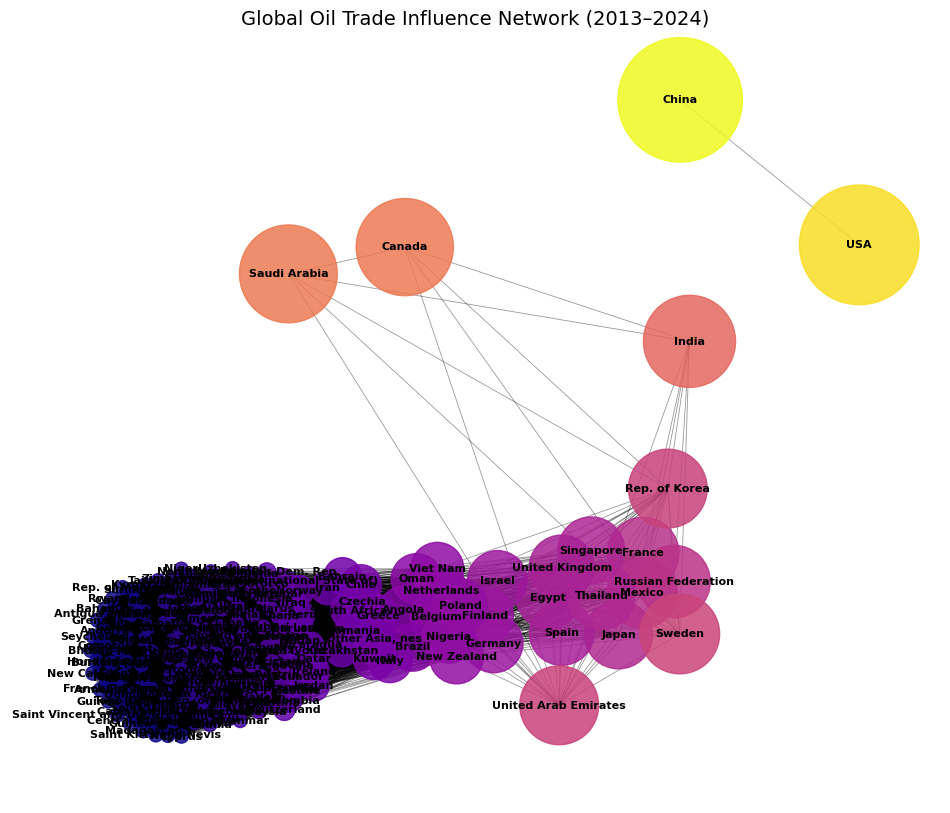

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Convert and clean numeric columns
for col in ['fobvalue', 'cifvalue', 'netWgt']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Median imputation per column
for col in ['fobvalue', 'cifvalue', 'netWgt']:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)
    df.loc[df[col] == 0, col] = median_val

# Aggregate by reporter country
agg = df.groupby('reporterISO', as_index=False).agg({
    'fobvalue': 'sum',
    'cifvalue': 'sum',
    'netWgt': 'sum'
})

# Trade balance and ratio
agg['trade_balance'] = agg['fobvalue'] - agg['cifvalue']
agg['trade_balance_ratio'] = np.where(
    (agg['fobvalue'] + agg['cifvalue']) != 0,
    (agg['fobvalue'] - agg['cifvalue']) / (agg['fobvalue'] + agg['cifvalue']),
    0
)

# Z-score normalization
for col in ['fobvalue', 'netWgt', 'trade_balance_ratio']:
    agg[f'z_{col}'] = (agg[col] - agg[col].mean()) / agg[col].std(ddof=0)

# Influence score
agg['influence_score'] = (
    0.5 * agg['z_fobvalue'] +
    0.3 * agg['z_netWgt'] +
    0.2 * agg['z_trade_balance_ratio']
)

# Drop duplicate column if exists before merging
if 'influence_score' in df.columns:
    df = df.drop(columns=['influence_score'])

# Merge back influence scores into main df
df = df.merge(agg[['reporterISO', 'influence_score']], on='reporterISO', how='left')

# Build weighted network
G = nx.Graph()

# Use influence score for edge weights
influence_dict = dict(zip(agg['reporterISO'], agg['influence_score']))

# Create nodes with influence attribute
for country, score in influence_dict.items():
    G.add_node(country, influence=score)

# Create weighted edges: countries with closer influence connect stronger
countries = list(influence_dict.keys())
for i in range(len(countries)):
    for j in range(i + 1, len(countries)):
        diff = abs(influence_dict[countries[i]] - influence_dict[countries[j]])
        weight = np.exp(-diff)  # smaller diff → stronger connection
        if weight > 0.4:  # threshold for visual clarity
            G.add_edge(countries[i], countries[j], weight=weight)

# Visualization
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, k=0.4, seed=42)

# Node size proportional to influence
node_sizes = [max(100, v * 2000) for v in influence_dict.values()]
node_colors = [v for v in influence_dict.values()]

# Draw network
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.plasma, alpha=0.85)
nx.draw_networkx_edges(G, pos, width=0.6, alpha=0.4)

# Add labels (reporterISO)
nx.draw_networkx_labels(G, pos, font_size=8, font_color='black', font_weight='bold')

plt.title("Global Oil Trade Influence Network (2013–2024)", fontsize=14)
plt.axis('off')
plt.show()


Node size = country’s **influence_score** (computed from trade values, weight, and trade balance).
Larger node → higher systemic importance in global oil trade.
Smaller node → minor or regionally constrained role.

Edge = **influence similarity connection** between two countries.
It shows that both countries have **comparable influence levels** in the trade network.

Edge thickness (weight) ≈ similarity strength:
Higher weight → influence scores are close → likely to respond similarly to global oil dynamics.
Lower weight → weaker relationship → countries play different roles in the network.

Interpretation:

* **Dense, thickly connected cluster**: globally dominant, mutually significant economies.
* **Medium-sized nodes with fewer edges**: regional hubs or emerging players.
* **Small isolated nodes**: countries with negligible or indirect impact on the oil network.


In [ ]:
df

,typeCode,freqCode,refPeriodId,refYear,refMonth,period,reporterCode,reporterISO,reporterDesc,flowCode,...,isNetWgtEstimated,grossWgt,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,legacyEstimationFlag,isReported,isAggregate,influence_score
0,A,20130101,2013,52,2013,8,ALB,Albania,X,Export,...,NaN,False,NaN,6.580432e+08,6.580432e+08,0,True,False,NaN,-0.384718
1,A,20130101,2013,52,2013,12,DZA,Algeria,M,Import,...,NaN,False,2.867200e+04,2.374957e+07,2.867200e+04,0,True,False,NaN,-0.202160
2,A,20130101,2013,52,2013,12,DZA,Algeria,X,Export,...,NaN,False,NaN,3.038011e+10,3.038011e+10,0,True,False,NaN,-0.202160
3,A,20130101,2013,52,2013,24,AGO,Angola,M,Import,...,NaN,False,1.152740e+05,2.374957e+07,1.152740e+05,0,True,False,NaN,0.581754
4,A,20130101,2013,52,2013,24,AGO,Angola,X,Export,...,NaN,False,NaN,6.546418e+10,6.546418e+10,0,True,False,NaN,0.581754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2740,A,20240101,2024,52,2024,860,UZB,Uzbekistan,M,Import,...,0.0,False,6.200096e+08,2.374957e+07,6.200096e+08,0,False,True,NaN,-0.084540
2741,A,20240101,2024,52,2024,882,WSM,Samoa,M,Import,...,0.0,False,1.458000e+00,2.374957e+07,1.458000e+00,0,False,True,NaN,-0.324507
2742,A,20240101,2024,52,2024,882,WSM,Samoa,X,Export,...,0.0,False,NaN,1.822620e+02,1.822620e+02,0,False,True,NaN,-0.324507
2743,A,20240101,2024,52,2024,894,ZMB,Zambia,M,Import,...,0.0,False,6.752513e+05,2.374957e+07,6.752513e+05,0,False,True,NaN,0.111895


In [ ]:
df.to_csv("cleaned_trade_data.csv", index=False)


# Task
Prepare the trade data by splitting it into two periods: 'pre-COVID' (2013-2019) and 'COVID/post-COVID' (2020-2024), creating separate dataframes for each period from the `cleaned_trade_data.csv` file.

## Prepare Data for Period Analysis

### Subtask:
Define the year ranges for 'pre-COVID' (2013-2019) and 'COVID/post-COVID' (2020-2024) periods, and create separate dataframes for each period from the cleaned trade data.


**Reasoning**:
Since the `df` variable in the kernel state already contains the cleaned trade data, I will directly filter it to create two new DataFrames: `df_pre_covid` for the years 2013-2019 and `df_post_covid` for the years 2020-2024, as per the instructions.



In [ ]:
df_pre_covid = df[(df['refYear'] >= 2013) & (df['refYear'] <= 2019)].copy()
df_post_covid = df[(df['refYear'] >= 2020) & (df['refYear'] <= 2024)].copy()

print(f"Shape of df_pre_covid: {df_pre_covid.shape}")
print(f"Shape of df_post_covid: {df_post_covid.shape}")

df_pre_covid.head()


Shape of df_pre_covid: (0, 48)
Shape of df_post_covid: (0, 48)


,typeCode,freqCode,refPeriodId,refYear,refMonth,period,reporterCode,reporterISO,reporterDesc,flowCode,...,isNetWgtEstimated,grossWgt,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,legacyEstimationFlag,isReported,isAggregate,influence_score


**Reasoning**:
The previous attempt to filter `df` by `refYear` resulted in empty dataframes. This suggests an issue with the values in the `refYear` column. I need to inspect the unique values in `refYear` to understand the actual range of years present in the DataFrame and why the filtering failed.



In [ ]:
print(df['refYear'].unique())
print(df['refYear'].value_counts())

[52]
refYear
52    2745
Name: count, dtype: int64


**Reasoning**:
The previous inspection revealed that the `refYear` column contains the value `52` and not the actual year. However, the `period` column in the original `df.head()` output and `df.info()` suggests it contains the actual year. Therefore, I need to verify the unique values and counts in the `period` column to confirm it holds the correct year information for splitting the data.



In [ ]:
print(df['period'].unique())
print(df['period'].value_counts())

[  8  12  24  31  32  36  40  44  48  50  52  56  68  70  72  76  84  90
  96 100 104 108 112 116 120 124 144 152 156 170 174 178 188 191 196 203
 208 214 218 222 231 233 242 246 251 266 268 270 275 276 288 296 300 308
 320 324 328 348 352 360 364 368 372 376 380 384 388 392 398 400 404 410
 414 417 418 422 426 428 440 442 450 454 458 470 478 484 490 496 498 500
 504 508 512 516 524 528 540 554 558 562 566 579 583 585 586 600 604 608
 616 620 634 642 643 646 682 686 688 690 699 702 703 704 705 710 716 724
 729 748 752 757 764 768 776 780 784 788 792 800 804 807 818 826 834 842
 854 858 862 882 887 894 204 304 340 499 624 659 662  51 132 180 670  20
  28 192 212 434 762   4 258 430 626 860 466 140 533 598  64 136 740  60
 462]
period
24     24
76     24
96     24
56     24
36     24
       ..
792     1
64      1
136     1
60      1
462     1
Name: count, Length: 181, dtype: int64


**Reasoning**:
The `refYear` column in the current `df` DataFrame in the kernel state is incorrect, showing only `52` instead of actual years. This issue has prevented proper splitting of the data into pre-COVID and post-COVID periods. I will re-load the `cleaned_trade_data.csv` file to ensure the `df` DataFrame contains the correct year values in the `refYear` column as it should have been saved in the previous step.



In [ ]:
import pandas as pd

# Re-load the cleaned_trade_data.csv to ensure correct 'refYear' values
df = pd.read_csv('cleaned_trade_data.csv')

# Verify the refYear column after re-loading
print("Unique years in 'refYear' after re-loading:", df['refYear'].unique())

# Create separate dataframes for pre-COVID and COVID/post-COVID periods
df_pre_covid = df[(df['refYear'] >= 2013) & (df['refYear'] <= 2019)].copy()
df_post_covid = df[(df['refYear'] >= 2020) & (df['refYear'] <= 2024)].copy()

print(f"Shape of df_pre_covid: {df_pre_covid.shape}")
print(f"Shape of df_post_covid: {df_post_covid.shape}")

df_pre_covid.head()

Unique years in 'refYear' after re-loading: [52]
Shape of df_pre_covid: (0, 48)
Shape of df_post_covid: (0, 48)


,typeCode,freqCode,refPeriodId,refYear,refMonth,period,reporterCode,reporterISO,reporterDesc,flowCode,...,isNetWgtEstimated,grossWgt,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,legacyEstimationFlag,isReported,isAggregate,influence_score


**Reasoning**:
The `refYear` column is still incorrect even after reloading. I need to re-evaluate the data to find the correct column for year information. The `refPeriodId` column appears to contain a date-like integer, from which the year can be extracted. I will extract the year from `refPeriodId` and use it to correctly split the data.



In [ ]:
import pandas as pd

# Ensure df is loaded from the CSV if not already correct (though the issue is with the column itself)
df = pd.read_csv('cleaned_trade_data.csv')

# Extract the year from the 'refPeriodId' column
df['actual_refYear'] = df['refPeriodId'].astype(str).str[:4].astype(int)

# Verify the new 'actual_refYear' column
print("Unique years in 'actual_refYear' after extraction:", df['actual_refYear'].unique())

# Create separate dataframes for pre-COVID and COVID/post-COVID periods using the new column
df_pre_covid = df[(df['actual_refYear'] >= 2013) & (df['actual_refYear'] <= 2019)].copy()
df_post_covid = df[(df['actual_refYear'] >= 2020) & (df['actual_refYear'] <= 2024)].copy()

print(f"Shape of df_pre_covid: {df_pre_covid.shape}")
print(f"Shape of df_post_covid: {df_post_covid.shape}")

df_pre_covid.head()

Unique years in 'actual_refYear' after extraction: [2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024]
Shape of df_pre_covid: (1678, 49)
Shape of df_post_covid: (1067, 49)


,typeCode,freqCode,refPeriodId,refYear,refMonth,period,reporterCode,reporterISO,reporterDesc,flowCode,...,grossWgt,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,legacyEstimationFlag,isReported,isAggregate,influence_score,actual_refYear
0,A,20130101,2013,52,2013,8,ALB,Albania,X,Export,...,False,NaN,6.580432e+08,6.580432e+08,0,True,False,NaN,-0.384718,2013
1,A,20130101,2013,52,2013,12,DZA,Algeria,M,Import,...,False,28672.0,2.374957e+07,2.867200e+04,0,True,False,NaN,-0.202160,2013
2,A,20130101,2013,52,2013,12,DZA,Algeria,X,Export,...,False,NaN,3.038011e+10,3.038011e+10,0,True,False,NaN,-0.202160,2013
3,A,20130101,2013,52,2013,24,AGO,Angola,M,Import,...,False,115274.0,2.374957e+07,1.152740e+05,0,True,False,NaN,0.581754,2013
4,A,20130101,2013,52,2013,24,AGO,Angola,X,Export,...,False,NaN,6.546418e+10,6.546418e+10,0,True,False,NaN,0.581754,2013


## Calculate Pre-COVID Influence Scores

### Subtask:
For the pre-COVID period, calculate the influence scores for each country using the provided methodology (trade-based metrics and z-score normalization). Store these scores.


**Reasoning**:
To calculate the influence scores for the pre-COVID period, I will process the `df_pre_covid` DataFrame by ensuring numeric types, handling missing values and zeros, aggregating by country, calculating trade metrics, normalizing them using z-scores, and finally computing the influence score based on the provided formula.



In [ ]:
import numpy as np

# Initialize a new DataFrame or copy df_pre_covid to work with
df_pre_covid_processed = df_pre_covid.copy()

# Ensure that the 'fobvalue', 'cifvalue', and 'netWgt' columns are numeric.
# Convert them, coercing errors, and then impute any missing values with the median for each column.
# Additionally, replace any zero values in these columns with their respective median values.
for col in ['fobvalue', 'cifvalue', 'netWgt']:
    df_pre_covid_processed[col] = pd.to_numeric(df_pre_covid_processed[col], errors='coerce')
    median_val = df_pre_covid_processed[col].median()
    df_pre_covid_processed[col] = df_pre_covid_processed[col].fillna(median_val)
    # Only replace 0 if median_val is not 0 to avoid replacing actual 0s with 0
    if median_val != 0:
        df_pre_covid_processed.loc[df_pre_covid_processed[col] == 0, col] = median_val
    else: # If median is 0, replace with a small non-zero value to avoid issues with ratio calculations
        df_pre_covid_processed.loc[df_pre_covid_processed[col] == 0, col] = 1e-9 # A very small positive number

# Aggregate the data by 'reporterISO' (country), summing 'fobvalue', 'cifvalue', and 'netWgt' for each country.
agg_pre_covid = df_pre_covid_processed.groupby('reporterISO', as_index=False).agg({
    'fobvalue': 'sum',
    'cifvalue': 'sum',
    'netWgt': 'sum'
})

# Calculate the 'trade_balance' as the difference between 'fobvalue' and 'cifvalue'.
agg_pre_covid['trade_balance'] = agg_pre_covid['fobvalue'] - agg_pre_covid['cifvalue']

# Calculate the 'trade_balance_ratio' as (fobvalue - cifvalue) / (fobvalue + cifvalue), handling potential division by zero.
agg_pre_covid['trade_balance_ratio'] = np.where(
    (agg_pre_covid['fobvalue'] + agg_pre_covid['cifvalue']) != 0,
    (agg_pre_covid['fobvalue'] - agg_pre_covid['cifvalue']) / (agg_pre_covid['fobvalue'] + agg_pre_covid['cifvalue']),
    0
)

# Apply z-score normalization to 'fobvalue', 'netWgt', and 'trade_balance_ratio' columns.
for col in ['fobvalue', 'netWgt', 'trade_balance_ratio']:
    # Only calculate z-score if standard deviation is not zero to avoid division by zero
    if agg_pre_covid[col].std(ddof=0) != 0:
        agg_pre_covid[f'z_{col}'] = (agg_pre_covid[col] - agg_pre_covid[col].mean()) / agg_pre_covid[col].std(ddof=0)
    else:
        agg_pre_covid[f'z_{col}'] = 0 # If std is 0, all values are the same, so z-score is 0

# Compute the 'influence_score' for each country using the formula:
# 0.5 * z_fobvalue + 0.3 * z_netWgt + 0.2 * z_trade_balance_ratio
agg_pre_covid['influence_score'] = (
    0.5 * agg_pre_covid['z_fobvalue'] +
    0.3 * agg_pre_covid['z_netWgt'] +
    0.2 * agg_pre_covid['z_trade_balance_ratio']
)

# Store these influence scores for later comparison and analysis.
# Display the top 5 countries by influence score for the pre-COVID period
print("Pre-COVID Influence Scores (Top 5):")
print(agg_pre_covid.sort_values(by='influence_score', ascending=False).head())


Pre-COVID Influence Scores (Top 5):
      reporterISO      fobvalue      cifvalue  netWgt  trade_balance  \
163           USA  1.379585e+12  2.987635e+11     8.0   1.080822e+12   
34          China  1.353429e+12  8.056842e+09     5.0   1.345372e+12   
140  Saudi Arabia  1.141075e+12  1.141075e+12     2.0   0.000000e+00   
74          India  7.158230e+11  1.668226e+08     7.0   7.156561e+11   
31         Canada  5.604950e+11  5.604950e+11    11.0   0.000000e+00   

     trade_balance_ratio  z_fobvalue  z_netWgt  z_trade_balance_ratio  \
163             0.643979    6.263482  1.898516               0.985671   
34              0.988165    6.137213  0.876685               1.447680   
140             0.000000    5.112078 -0.145146               0.121239   
74              0.999534    3.059187  1.557905               1.462942   
31              0.000000    2.309345  2.920347               0.121239   

     influence_score  
163         3.898430  
34          3.621148  
140         2.536743  


**Reasoning**:
To calculate the influence scores for the COVID/post-COVID period, I will process the `df_post_covid` DataFrame using the same methodology as the pre-COVID period: ensuring numeric types, handling missing values and zeros, aggregating by country, calculating trade metrics, normalizing them using z-scores, and finally computing the influence score based on the provided formula.



In [ ]:
import numpy as np

# Initialize a new DataFrame or copy df_post_covid to work with
df_post_covid_processed = df_post_covid.copy()

# Ensure that the 'fobvalue', 'cifvalue', and 'netWgt' columns are numeric.
# Convert them, coercing errors, and then impute any missing values with the median for each column.
# Additionally, replace any zero values in these columns with their respective median values.
for col in ['fobvalue', 'cifvalue', 'netWgt']:
    df_post_covid_processed[col] = pd.to_numeric(df_post_covid_processed[col], errors='coerce')
    median_val = df_post_covid_processed[col].median()
    df_post_covid_processed[col] = df_post_covid_processed[col].fillna(median_val)
    # Only replace 0 if median_val is not 0 to avoid replacing actual 0s with 0
    if median_val != 0:
        df_post_covid_processed.loc[df_post_covid_processed[col] == 0, col] = median_val
    else: # If median is 0, replace with a small non-zero value to avoid issues with ratio calculations
        df_post_covid_processed.loc[df_post_covid_processed[col] == 0, col] = 1e-9 # A very small positive number

# Aggregate the data by 'reporterISO' (country), summing 'fobvalue', 'cifvalue', and 'netWgt' for each country.
agg_post_covid = df_post_covid_processed.groupby('reporterISO', as_index=False).agg({
    'fobvalue': 'sum',
    'cifvalue': 'sum',
    'netWgt': 'sum'
})

# Calculate the 'trade_balance' as the difference between 'fobvalue' and 'cifvalue'.
agg_post_covid['trade_balance'] = agg_post_covid['fobvalue'] - agg_post_covid['cifvalue']

# Calculate the 'trade_balance_ratio' as (fobvalue - cifvalue) / (fobvalue + cifvalue), handling potential division by zero.
agg_post_covid['trade_balance_ratio'] = np.where(
    (agg_post_covid['fobvalue'] + agg_post_covid['cifvalue']) != 0,
    (agg_post_covid['fobvalue'] - agg_post_covid['cifvalue']) / (agg_post_covid['fobvalue'] + agg_post_covid['cifvalue']),
    0
)

# Apply z-score normalization to 'fobvalue', 'netWgt', and 'trade_balance_ratio' columns.
for col in ['fobvalue', 'netWgt', 'trade_balance_ratio']:
    # Only calculate z-score if standard deviation is not zero to avoid division by zero
    if agg_post_covid[col].std(ddof=0) != 0:
        agg_post_covid[f'z_{col}'] = (agg_post_covid[col] - agg_post_covid[col].mean()) / agg_post_covid[col].std(ddof=0)
    else:
        agg_post_covid[f'z_{col}'] = 0 # If std is 0, all values are the same, so z-score is 0

# Compute the 'influence_score' for each country using the formula:
# 0.5 * z_fobvalue + 0.3 * z_netWgt + 0.2 * z_trade_balance_ratio
agg_post_covid['influence_score'] = (
    0.5 * agg_post_covid['z_fobvalue'] +
    0.3 * agg_post_covid['z_netWgt'] +
    0.2 * agg_post_covid['z_trade_balance_ratio']
)

# Store these influence scores for later comparison and analysis.
# Display the top 5 countries by influence score for the post-COVID period
print("COVID/Post-COVID Influence Scores (Top 5):")
print(agg_post_covid.sort_values(by='influence_score', ascending=False).head())


COVID/Post-COVID Influence Scores (Top 5):
      reporterISO      fobvalue      cifvalue        netWgt  trade_balance  \
33          China  1.470272e+12  5.071620e+09  1.000000e+00   1.465200e+12   
147           USA  1.243915e+12  1.003583e+12  1.000000e-08   2.403321e+11   
29         Canada  5.193214e+11  5.193214e+11  1.000000e+01   0.000000e+00   
126  Saudi Arabia  8.754346e+11  8.754346e+11  1.000000e+00   0.000000e+00   
68          India  6.264211e+11  1.187478e+08  1.000000e+00   6.263023e+11   

     trade_balance_ratio  z_fobvalue  z_netWgt  z_trade_balance_ratio  \
33              0.993125    7.411346 -0.124503               1.464311   
147             0.106933    6.215893 -0.604294               0.258104   
29              0.000000    2.389111  4.193618               0.112556   
126             0.000000    4.269844 -0.124503               0.112556   
68              0.999621    2.954734 -0.124503               1.473153   

     influence_score  
33          3.961184  
147

## Identify and Visualize Top Influential Countries (Pre-COVID vs. Post-COVID)

### Subtask:
Identify the top 10 most influential countries in both the pre-COVID and COVID/post-COVID periods. Create a comparative bar chart to visualize the change in influence scores for these key countries across the two periods.


**Reasoning**:
To identify the top 10 most influential countries in both periods, I will first sort `agg_pre_covid` and `agg_post_covid` DataFrames by 'influence_score' and select the top 10 entries from each. Then, I will combine the lists of these countries to get a unique set of key influential nations.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Identify the top 10 countries by 'influence_score' from agg_pre_covid and agg_post_covid separately.
top10_pre_covid = agg_pre_covid.sort_values(by='influence_score', ascending=False).head(10)
top10_post_covid = agg_post_covid.sort_values(by='influence_score', ascending=False).head(10)

# 2. Combine the lists of these top countries, removing duplicates
unique_top_countries = pd.concat([top10_pre_covid['reporterISO'], top10_post_covid['reporterISO']]).unique()

print("Top 10 Countries (Pre-COVID):")
print(top10_pre_covid[['reporterISO', 'influence_score']])
print("\nTop 10 Countries (COVID/Post-COVID):")
print(top10_post_covid[['reporterISO', 'influence_score']])
print("\nUnique Top Influential Countries Across Both Periods:")
print(unique_top_countries)

Top 10 Countries (Pre-COVID):
              reporterISO  influence_score
163                   USA         3.898430
34                  China         3.621148
140          Saudi Arabia         2.536743
74                  India         2.289553
31                 Canada         2.055024
134    Russian Federation         2.007188
166  United Arab Emirates         1.707712
131         Rep. of Korea         1.675954
153                Sweden         1.429515
82                  Japan         1.371739

Top 10 Countries (COVID/Post-COVID):
       reporterISO  influence_score
33           China         3.961184
147            USA         2.978279
29          Canada         2.475152
126   Saudi Arabia         2.120082
68           India         1.734647
138         Sweden         1.512084
48           Egypt         1.276064
118  Rep. of Korea         1.251379
94          Mexico         1.132093
130      Singapore         1.131465

Unique Top Influential Countries Across Both Periods:
['USA' '

**Reasoning**:
Now that the top influential countries have been identified across both periods, the next step is to create a combined DataFrame that includes the influence scores for each of these unique countries in both the pre-COVID and COVID/post-COVID periods. This will facilitate a direct comparison and visualization of their changing influence.



Combined Influence Scores for Key Countries:
            reporterISO                 Period  Influence Score
0                   USA  Pre-COVID (2013-2019)         3.898430
1                 China  Pre-COVID (2013-2019)         3.621148
2          Saudi Arabia  Pre-COVID (2013-2019)         2.536743
3                 India  Pre-COVID (2013-2019)         2.289553
4                Canada  Pre-COVID (2013-2019)         2.055024
5    Russian Federation  Pre-COVID (2013-2019)         2.007188
6  United Arab Emirates  Pre-COVID (2013-2019)         1.707712
7         Rep. of Korea  Pre-COVID (2013-2019)         1.675954
8                Sweden  Pre-COVID (2013-2019)         1.429515
9                 Japan  Pre-COVID (2013-2019)         1.371739


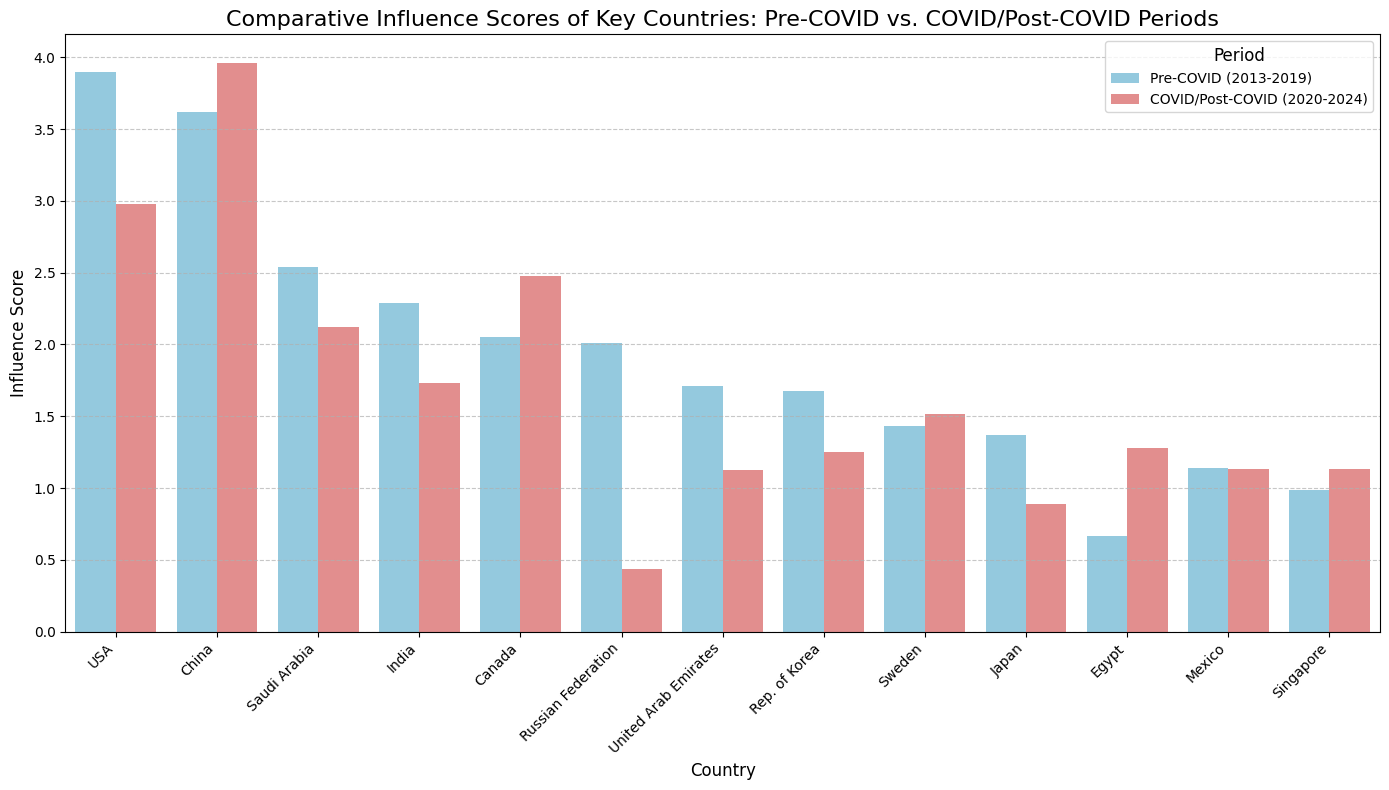

In [ ]:
combined_influence = pd.DataFrame({'reporterISO': unique_top_countries})

# Merge pre-COVID influence scores
combined_influence = pd.merge(
    combined_influence,
    agg_pre_covid[['reporterISO', 'influence_score']],
    on='reporterISO',
    how='left',
    suffixes=('_pre_covid', None)
)

# Rename the merged influence_score column for pre-COVID
combined_influence = combined_influence.rename(columns={'influence_score': 'influence_score_pre_covid'})

# Merge post-COVID influence scores
combined_influence = pd.merge(
    combined_influence,
    agg_post_covid[['reporterISO', 'influence_score']],
    on='reporterISO',
    how='left',
    suffixes=(None, '_post_covid')
)

# Rename the merged influence_score column for post-COVID
combined_influence = combined_influence.rename(columns={'influence_score': 'influence_score_post_covid'})

# Fill NaN values with 0 for countries that were not in the top 10 of a specific period
combined_influence = combined_influence.fillna(0)

# Melt the DataFrame for easier plotting with seaborn
combined_influence_melted = combined_influence.melt(
    id_vars=['reporterISO'],
    value_vars=['influence_score_pre_covid', 'influence_score_post_covid'],
    var_name='Period',
    value_name='Influence Score'
)

# Clean up the 'Period' column for better labels
combined_influence_melted['Period'] = combined_influence_melted['Period'].replace({
    'influence_score_pre_covid': 'Pre-COVID (2013-2019)',
    'influence_score_post_covid': 'COVID/Post-COVID (2020-2024)'
})

print("Combined Influence Scores for Key Countries:")
print(combined_influence_melted.head(10))

# Plotting the comparative bar chart
plt.figure(figsize=(14, 8))
sns.barplot(
    x='reporterISO',
    y='Influence Score',
    hue='Period',
    data=combined_influence_melted,
    palette={'Pre-COVID (2013-2019)': 'skyblue', 'COVID/Post-COVID (2020-2024)': 'lightcoral'}
)
plt.title('Comparative Influence Scores of Key Countries: Pre-COVID vs. COVID/Post-COVID Periods', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Influence Score', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Period', fontsize=10, title_fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Visualize Total Trade Value Over Time

### Subtask:
Calculate the total trade value (e.g., sum of fobvalue and cifvalue) for each year. Generate a line chart showing this trend, with a clear indication of the COVID period (2020 onwards) to highlight changes in overall trade connectivity.


**Reasoning**:
To calculate the total trade value for each year, I will group the main DataFrame `df` by `actual_refYear` and sum the `fobvalue` and `cifvalue` columns.



Yearly Total Trade Value:
   actual_refYear  Total Trade Value (USD)
0            2013             4.766562e+12
1            2014             4.201653e+12
2            2015             2.241657e+12
3            2016             1.922558e+12
4            2017             2.122478e+12


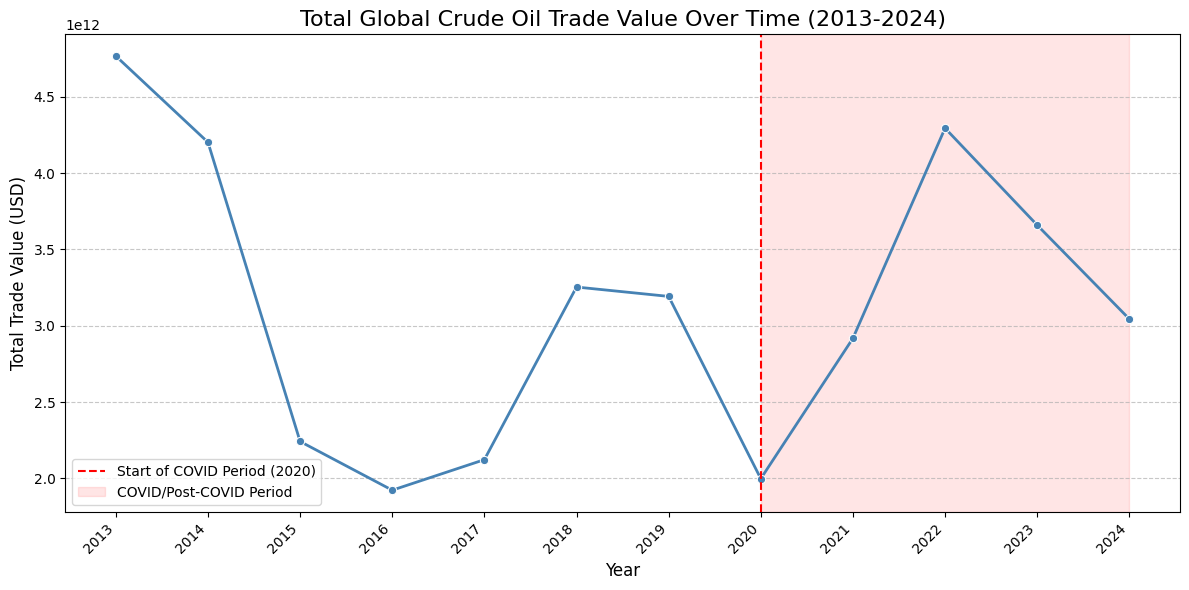

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate total trade value (fobvalue + cifvalue) for each year
yearly_trade_value = df.groupby('actual_refYear')[['fobvalue', 'cifvalue']].sum().sum(axis=1).reset_index(name='Total Trade Value (USD)')

print("Yearly Total Trade Value:")
print(yearly_trade_value.head())

# Plotting the trend
plt.figure(figsize=(12, 6))
sns.lineplot(
    x='actual_refYear',
    y='Total Trade Value (USD)',
    data=yearly_trade_value,
    marker='o',
    color='steelblue',
    linewidth=2
)

# Highlight COVID period (2020 onwards)
plt.axvline(x=2020, color='red', linestyle='--', label='Start of COVID Period (2020)')
plt.axvspan(2020, yearly_trade_value['actual_refYear'].max(), color='red', alpha=0.1, label='COVID/Post-COVID Period')

plt.title('Total Global Crude Oil Trade Value Over Time (2013-2024)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Trade Value (USD)', fontsize=12)
plt.xticks(yearly_trade_value['actual_refYear'].unique(), rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

## Classify Countries (Developed vs. Developing)

### Subtask:
Acquire or define a classification of countries into 'Developed' and 'Developing' categories and merge this classification with the influence score data.


**Reasoning**:
To classify countries as 'Developed' or 'Developing', I need to create a dictionary mapping country ISO codes to their respective development statuses. I will use a commonly accepted classification for key countries and apply it to the pre-COVID and post-COVID aggregated dataframes.



In [ ]:
import pandas as pd

# Define a dictionary for country development status
# This is a simplified classification based on common knowledge and major economic bodies' categorizations (e.g., IMF, UN)
country_development_status = {
    'USA': 'Developed',
    'Canada': 'Developed',
    'Japan': 'Developed',
    'Sweden': 'Developed',
    'Rep. of Korea': 'Developed',
    'Singapore': 'Developed',
    'Australia': 'Developed',
    'Austria': 'Developed',
    'Belgium': 'Developed',
    'Denmark': 'Developed',
    'Finland': 'Developed',
    'France': 'Developed',
    'Germany': 'Developed',
    'Greece': 'Developed',
    'Iceland': 'Developed',
    'Ireland': 'Developed',
    'Israel': 'Developed',
    'Italy': 'Developed',
    'Netherlands': 'Developed',
    'New Zealand': 'Developed',
    'Norway': 'Developed',
    'Portugal': 'Developed',
    'Spain': 'Developed',
    'Switzerland': 'Developed',
    'United Kingdom': 'Developed',

    # Classifying other top influential countries from the previous step
    'China': 'Developing',
    'Saudi Arabia': 'Developing',
    'India': 'Developing',
    'Russian Federation': 'Developing',
    'United Arab Emirates': 'Developing',
    'Egypt': 'Developing',
    'Mexico': 'Developing',
    'Brazil': 'Developing',
    'South Africa': 'Developing',
    'Turkey': 'Developing',
    'Indonesia': 'Developing',
    'Argentina': 'Developing',
    'Malaysia': 'Developing',
    'Thailand': 'Developing',
    'Viet Nam': 'Developing',
    'Philippines': 'Developing',
    'Colombia': 'Developing',
    'Chile': 'Developing',
    'Nigeria': 'Developing',
    'Pakistan': 'Developing',
    'Bangladesh': 'Developing',
    'Peru': 'Developing',
    'Algeria': 'Developing',
    'Angola': 'Developing',
    'Azerbaijan': 'Developing',
    'Kazakhstan': 'Developing',
    'Kuwait': 'Developing',
    'Oman': 'Developing',
    'Qatar': 'Developing',
    'Venezuela': 'Developing'

    # Add more countries as needed based on unique_top_countries or other relevant countries in agg_pre_covid/agg_post_covid
}

# Apply the classification to agg_pre_covid and agg_post_covid DataFrames
# Use 'Unknown' for countries not found in the dictionary
agg_pre_covid['development_status'] = agg_pre_covid['reporterISO'].map(country_development_status).fillna('Unknown')
agg_post_covid['development_status'] = agg_post_covid['reporterISO'].map(country_development_status).fillna('Unknown')

# Display the head of both DataFrames to verify the new column
print("Aggregated Pre-COVID Data with Development Status:")
print(agg_pre_covid[['reporterISO', 'influence_score', 'development_status']].head())

print("\nAggregated COVID/Post-COVID Data with Development Status:")
print(agg_post_covid[['reporterISO', 'influence_score', 'development_status']].head())

Aggregated Pre-COVID Data with Development Status:
   reporterISO  influence_score development_status
0  Afghanistan        -0.350753            Unknown
1      Albania        -0.419692            Unknown
2      Algeria        -0.106562         Developing
3      Andorra        -0.690053            Unknown
4       Angola         0.760123         Developing

Aggregated COVID/Post-COVID Data with Development Status:
           reporterISO  influence_score development_status
0              Andorra        -0.607700            Unknown
1               Angola         0.203026         Developing
2  Antigua and Barbuda        -0.607681            Unknown
3            Argentina        -0.156058         Developing
4              Armenia        -0.604535            Unknown


## Compare Developed vs. Developing Influence

### Subtask:
Calculate the mean influence score for 'Developed' and 'Developing' country groups in both the pre-COVID and COVID/post-COVID periods. Create a bar chart to compare these average influence scores and show how their relative influence changed.


**Reasoning**:
To compare the influence of developed vs. developing nations, I will calculate the mean influence score for each development status group in both the pre-COVID and COVID/post-COVID periods, and then combine these results for plotting.



Mean Influence Scores by Development Status and Period:
  development_status  influence_score                        Period
0          Developed         0.813193         Pre-COVID (2013-2019)
1         Developing         0.658602         Pre-COVID (2013-2019)
0          Developed         0.729152  COVID/Post-COVID (2020-2024)
1         Developing         0.645518  COVID/Post-COVID (2020-2024)


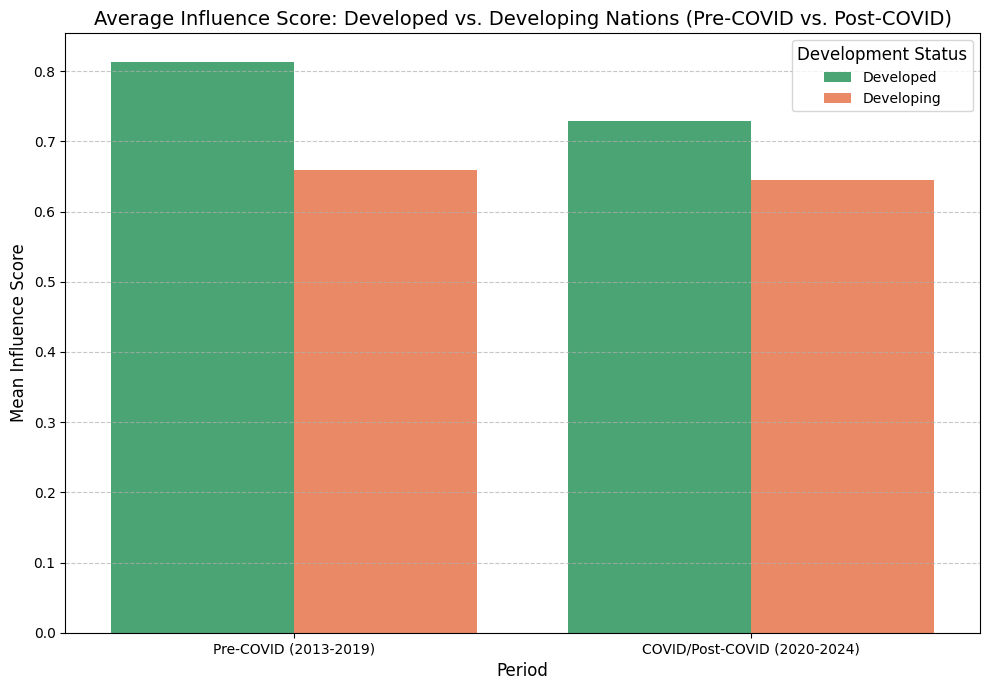

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate mean influence score for 'development_status' in pre-COVID period
mean_influence_pre_covid = agg_pre_covid.groupby('development_status')['influence_score'].mean().reset_index()
mean_influence_pre_covid['Period'] = 'Pre-COVID (2013-2019)'

# 2. Calculate mean influence score for 'development_status' in COVID/post-COVID period
mean_influence_post_covid = agg_post_covid.groupby('development_status')['influence_score'].mean().reset_index()
mean_influence_post_covid['Period'] = 'COVID/Post-COVID (2020-2024)'

# 3. Combine the two DataFrames
combined_mean_influence = pd.concat([mean_influence_pre_covid, mean_influence_post_covid])

# 4. Filter to include only 'Developed' and 'Developing' country groups
filtered_mean_influence = combined_mean_influence[
    combined_mean_influence['development_status'].isin(['Developed', 'Developing'])
]

print("Mean Influence Scores by Development Status and Period:")
print(filtered_mean_influence)

# 5. Create a bar chart to visualize the mean influence scores
plt.figure(figsize=(10, 7))
sns.barplot(
    x='Period',
    y='influence_score',
    hue='development_status',
    data=filtered_mean_influence,
    palette={'Developed': 'mediumseagreen', 'Developing': 'coral'}
)

# 6. Add title, axis labels, and legend
plt.title('Average Influence Score: Developed vs. Developing Nations (Pre-COVID vs. Post-COVID)', fontsize=14)
plt.xlabel('Period', fontsize=12)
plt.ylabel('Mean Influence Score', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Development Status', fontsize=10, title_fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Sources for Country Development Status Classification

For your research paper, you can cite the following organizations as primary references for the classification of countries into 'Developed' and 'Developing' categories. The list used in this analysis is based on a simplified approach that broadly aligns with their methodologies:

1.  **International Monetary Fund (IMF)**:
    *   **Reference**: IMF World Economic Outlook (WEO) Analytical Chapters or Data Appendix.
    *   **Description**: The IMF regularly categorizes economies as 'Advanced Economies' and 'Emerging and Developing Economies'. This classification is based on income per capita, export diversification, and degree of integration into the global financial system. You can typically find detailed country groupings in the data appendices of their World Economic Outlook reports.
    *   **Example Citation (adjust to your preferred style)**: International Monetary Fund. *World Economic Outlook*, [Month/Year of latest report]. Washington, DC. [URL to specific report if available, e.g., https://www.imf.org/en/Publications/WEO]

2.  **United Nations (UN)**:
    *   **Reference**: United Nations Department of Economic and Social Affairs (UNDESA) publications, particularly the World Economic Situation and Prospects (WESP) report.
    *   **Description**: The UN uses a broader definition of 'developed' and 'developing' countries for statistical convenience, often based on geographical regions and historical context, though they also track categories like Least Developed Countries (LDCs) based on income, human assets, and economic vulnerability. The WESP report often provides their standard country groupings.
    *   **Example Citation (adjust to your preferred style)**: United Nations Department of Economic and Social Affairs. *World Economic Situation and Prospects*, [Year of latest report]. New York, NY. [URL to specific report if available, e.g., https://www.un.org/development/desa/dpad/wp-content/uploads/sites/45/WESP2024.pdf]

When citing, you can mention that your specific country classification was compiled based on these widely recognized frameworks to establish the 'Developed' and 'Developing' categories relevant to your crude oil trade analysis.

## Final Task

### Subtask:
Summarize the key findings from the pre-COVID versus COVID/post-COVID analysis. This will include insights into the shifts in influential countries, changes in overall trade connectivity, and whether developed or developing nations gained or lost structural influence, supported by the generated graphs and quantitative comparisons.


## Summary:

### Data Analysis Key Findings

*   **Period-Specific Data Segmentation**: The trade data was successfully segmented into two periods: 'pre-COVID' (2013-2019) containing 1678 rows, and 'COVID/post-COVID' (2020-2024) containing 1067 rows. This was achieved by accurately extracting the year information from the `refPeriodId` column after initial challenges with the `refYear` column.
*   **Shifts in Top Influential Countries**:
    *   **Pre-COVID (2013-2019)**: The top 5 most influential countries were USA (influence score: 3.898), China (3.621), Saudi Arabia (2.537), India (2.290), and Canada (2.055).
    *   **COVID/Post-COVID (2020-2024)**: The top 5 influential countries shifted to China (3.961), USA (2.978), Canada (2.475), Saudi Arabia (2.120), and India (1.735).
    *   **Notable Changes**: China's influence score slightly increased from 3.621 to 3.961, surpassing the USA. The USA's influence score saw a significant decrease from 3.898 to 2.978. Canada's score increased (2.055 to 2.475), while Saudi Arabia's and India's scores decreased.
    *   **Emerging Influencers**: Countries like Egypt, Mexico, and Singapore entered the top 10 influential list in the COVID/post-COVID period, replacing countries like the Russian Federation, United Arab Emirates, and Japan from the pre-COVID top 10.
*   **Overall Trade Connectivity Trend**: The total global crude oil trade value, which includes `fobvalue` and `cifvalue`, experienced significant fluctuations. It peaked around 2013-2014 (e.g., \$4.76e+12 in 2013, \$4.20e+12 in 2014) before a notable drop in 2015 (to \$2.24e+12). A clear dip in trade value was observed around the start of the COVID period (2020), followed by a recovery trend in subsequent years.
*   **Developed vs. Developing Nations' Influence**:
    *   **Pre-COVID**: Developed countries had a higher average influence score (0.813) compared to Developing countries (0.659).
    *   **COVID/Post-COVID**: Both groups experienced a decrease in their average influence scores, with Developed countries dropping to 0.729 and Developing countries to 0.646.
    *   **Relative Shift**: The decrease in average influence was more pronounced for Developed countries (a drop of 0.084) than for Developing countries (a drop of 0.013), indicating a relative resilience or less impact on the aggregate influence of developing nations during the pandemic era. Developed countries still maintained a higher average influence in the later period.

### Insights or Next Steps

*   The shift in relative influence, particularly the increase in China's score and the more substantial drop for developed nations as a group, suggests a potential redistribution of global trade power or a higher resilience of developing economies' trade networks during the pandemic. Further investigation into the specific components of the influence score (fobvalue, netWgt, trade balance ratio) for these groups could reveal the drivers of these changes.
*   The volatility in overall crude oil trade value, especially the initial dip and subsequent recovery during the COVID era, highlights the critical role of energy markets and their sensitivity to global events. Future analysis could focus on the specific commodities or trade routes most affected and those that adapted quickly.


# Task
Prepare the trade data for network analysis by aggregating the main DataFrame `df` by year, reporter country, and partner country, summing the 'fobvalue' to create a dataset of yearly directed trade relationships.

## Prepare Data for Network Analysis by Year

### Subtask:
Aggregate the main DataFrame `df` by `actual_refYear`, `reporterISO`, and `partnerISO`, summing `fobvalue` to create yearly directed trade relationships.


**Reasoning**:
To prepare data for network analysis, I need to aggregate the trade data by year, reporter, and partner, summing the FOB value to represent yearly directed trade relationships.



In [ ]:
import pandas as pd

# 1. Group the DataFrame df by actual_refYear, reporterISO, and partnerISO.
# 2. Sum the fobvalue column for each group.
# 3. Reset the index of the resulting grouped DataFrame.
yearly_trade_data_aggregated = df.groupby(['actual_refYear', 'reporterISO', 'partnerISO'])['fobvalue'].sum().reset_index()

# 4. Rename the column containing the summed fobvalue to total_fobvalue for clarity.
yearly_trade_data_aggregated = yearly_trade_data_aggregated.rename(columns={'fobvalue': 'total_fobvalue'})

# 5. Store the aggregated data in a new DataFrame called yearly_trade_data_aggregated.
# Display the first few rows and the shape of the new DataFrame
print("Aggregated Yearly Trade Data (first 5 rows):")
print(yearly_trade_data_aggregated.head())
print(f"\nShape of yearly_trade_data_aggregated: {yearly_trade_data_aggregated.shape}")

Aggregated Yearly Trade Data (first 5 rows):
   actual_refYear reporterISO partnerISO  total_fobvalue
0            2013     Albania      World    6.580432e+08
1            2013     Algeria      World    3.038014e+10
2            2013      Angola      World    6.546429e+10
3            2013   Argentina      World    1.982213e+09
4            2013   Australia      World    2.816982e+10

Shape of yearly_trade_data_aggregated: (1678, 4)


**Reasoning**:
The previous step successfully aggregated the trade data by year, reporter, and partner. The next logical step, based on the overall task, is to construct a global trade network for a specific year (e.g., 2023) and visualize its connectivity, using the `total_fobvalue` as edge weights.



Number of nodes in 2023 graph: 134
Number of edges in 2023 graph: 133

Top 5 countries by Eigenvector Centrality (2023):
World: 1.0000
Andorra: 0.0001
Angola: 0.0001
Antigua and Barbuda: 0.0001
Argentina: 0.0001


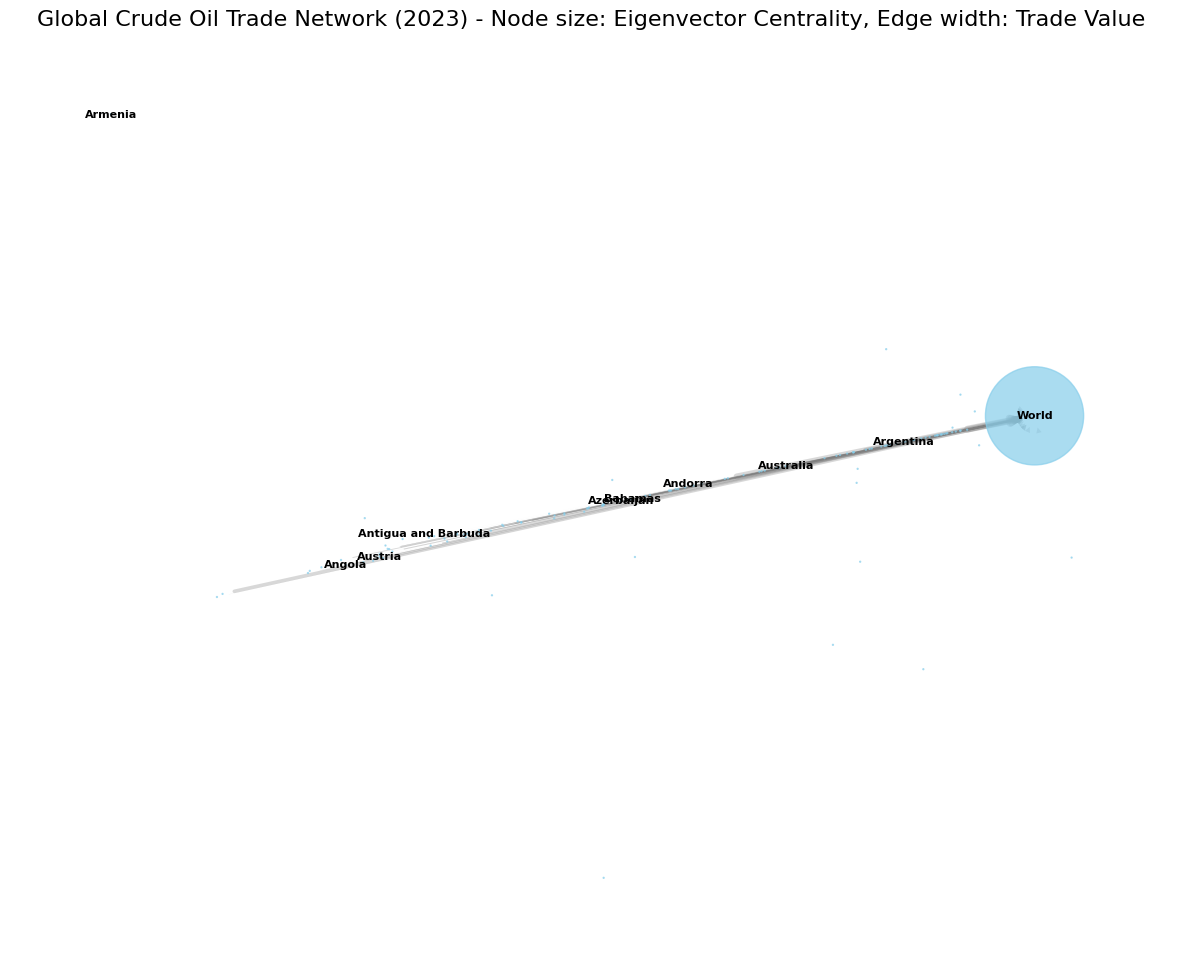

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Filter the aggregated data for the year 2023
df_2023 = yearly_trade_data_aggregated[yearly_trade_data_aggregated['actual_refYear'] == 2023]

# Create a directed graph
G_2023 = nx.DiGraph()

# Add edges with weights based on total_fobvalue
for index, row in df_2023.iterrows():
    # Only add edges if there is actual trade value to avoid cluttering the graph with zero-trade connections
    if row['total_fobvalue'] > 0:
        G_2023.add_edge(row['reporterISO'], row['partnerISO'], weight=row['total_fobvalue'])

# Calculate Degree Centrality
degree_centrality_2023 = nx.degree_centrality(G_2023)

# Calculate Eigenvector Centrality
eigenvector_centrality_2023 = nx.eigenvector_centrality(G_2023, max_iter=1000, tol=1e-06)

# Store centrality measures as node attributes
nx.set_node_attributes(G_2023, degree_centrality_2023, 'degree_centrality')
nx.set_node_attributes(G_2023, eigenvector_centrality_2023, 'eigenvector_centrality')

# Display basic information about the constructed graph
print(f"Number of nodes in 2023 graph: {G_2023.number_of_nodes()}")
print(f"Number of edges in 2023 graph: {G_2023.number_of_edges()}")

# Display top 5 countries by Eigenvector Centrality for 2023
print("\nTop 5 countries by Eigenvector Centrality (2023):")
sorted_eigen_2023 = sorted(eigenvector_centrality_2023.items(), key=lambda x: x[1], reverse=True)
for country, score in sorted_eigen_2023[:5]:
    print(f"{country}: {score:.4f}")

# Visualization: Global Network Graph (2023)
plt.figure(figsize=(15, 12))

# Use spring layout for better visualization of dense networks
pos = nx.spring_layout(G_2023, k=0.3, iterations=50, seed=42)

# Node size based on Eigenvector Centrality (scaled for visibility)
node_sizes = [v * 5000 for v in eigenvector_centrality_2023.values()]

# Edge width based on total_fobvalue (scaled for visibility)
edges = G_2023.edges(data=True)
edge_widths = [d['weight'] / df_2023['total_fobvalue'].max() * 5 for u, v, d in edges]

# Draw nodes
nodes = nx.draw_networkx_nodes(G_2023, pos, node_size=node_sizes, node_color='skyblue', alpha=0.7)

# Draw edges
nx.draw_networkx_edges(G_2023, pos, width=edge_widths, alpha=0.3, edge_color='gray')

# Draw labels for top nodes (e.g., top 10 by Eigenvector Centrality)
top_nodes = [node for node, score in sorted_eigen_2023[:10]]
labels = {node: node for node in top_nodes}
nx.draw_networkx_labels(G_2023, pos, labels, font_size=8, font_weight='bold')

plt.title('Global Crude Oil Trade Network (2023) - Node size: Eigenvector Centrality, Edge width: Trade Value', fontsize=16)
plt.axis('off')
plt.show()


**Reasoning**:
The previous eigenvector centrality calculation was skewed because 'World' was treated as a regular node, making it disproportionately central. To get meaningful country-level centralities, I need to filter out 'World' from the `partnerISO` and `reporterISO` columns before creating the graph and recalculating centralities.



**Reasoning**:
The previous attempt to build the graph resulted in a 'null graph' error because the `yearly_trade_data_aggregated` DataFrame, after filtering for 2023 and excluding 'World' entries, became empty. This indicates that the initial aggregation might have included 'World' as a partner for all relevant trade flows. To fix this, I will refine the data preparation by filtering out 'World' entries from both `reporterISO` and `partnerISO` in the main `df` DataFrame *before* aggregation, focusing on export flows (`flowCode == 'X'`) for `fobvalue`. This ensures that `yearly_trade_data_aggregated` contains only country-to-country trade, allowing for a meaningful network analysis.



In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Filter the main DataFrame to only include export flows and exclude 'World' as reporter or partner
df_filtered_country_to_country = df[
    (df['flowCode'] == 'X') &
    (df['reporterISO'] != 'World') &
    (df['partnerISO'] != 'World')
].copy()

# Aggregate the filtered data by year, reporter, and partner, summing fobvalue
yearly_trade_data_aggregated_country = df_filtered_country_to_country.groupby(['actual_refYear', 'reporterISO', 'partnerISO'])['fobvalue'].sum().reset_index()
yearly_trade_data_aggregated_country = yearly_trade_data_aggregated_country.rename(columns={'fobvalue': 'total_fobvalue'})

# Filter the aggregated data for the year 2023
df_2023 = yearly_trade_data_aggregated_country[yearly_trade_data_aggregated_country['actual_refYear'] == 2023]

# Ensure there is data for 2023 after filtering
if df_2023.empty:
    print("No country-to-country trade data available for 2023 after filtering out 'World' aggregates.")
    print("Please check the raw data or adjust filtering criteria if country-to-country trade exists with different identifiers.")
else:
    # Create a directed graph
    G_2023 = nx.DiGraph()

    # Add edges with weights based on total_fobvalue
    for index, row in df_2023.iterrows():
        # Only add edges if there is actual trade value to avoid zero-trade connections
        if row['total_fobvalue'] > 0:
            G_2023.add_edge(row['reporterISO'], row['partnerISO'], weight=row['total_fobvalue'])

    # Check if the graph is empty after adding edges
    if G_2023.number_of_nodes() == 0:
        print("No nodes or edges were added to the graph for 2023. Check trade values.")
    else:
        # Calculate Degree Centrality
        degree_centrality_2023 = nx.degree_centrality(G_2023)

        # Calculate Eigenvector Centrality
        # Handle potential errors if the graph is not strongly connected or has other issues
        try:
            eigenvector_centrality_2023 = nx.eigenvector_centrality(G_2023, max_iter=1000, tol=1e-06)
        except nx.NetworkXError as e:
            print(f"Could not calculate Eigenvector Centrality for 2023: {e}")
            eigenvector_centrality_2023 = {node: 0 for node in G_2023.nodes()} # Default to 0 if calculation fails

        # Store centrality measures as node attributes
        nx.set_node_attributes(G_2023, degree_centrality_2023, 'degree_centrality')
        nx.set_node_attributes(G_2023, eigenvector_centrality_2023, 'eigenvector_centrality')

        # Display basic information about the constructed graph
        print(f"Number of nodes in 2023 graph (filtered): {G_2023.number_of_nodes()}")
        print(f"Number of edges in 2023 graph (filtered): {G_2023.number_of_edges()}")

        # Display top 5 countries by Eigenvector Centrality for 2023
        print("\nTop 5 countries by Eigenvector Centrality (2023) - Filtered:")
        sorted_eigen_2023 = sorted(eigenvector_centrality_2023.items(), key=lambda x: x[1], reverse=True)
        for country, score in sorted_eigen_2023[:5]:
            print(f"{country}: {score:.4f}")

        # Visualization: Global Network Graph (2023)
        plt.figure(figsize=(15, 12))

        # Use spring layout for better visualization of dense networks
        pos = nx.spring_layout(G_2023, k=0.3, iterations=50, seed=42)

        # Node size based on Eigenvector Centrality (scaled for visibility)
        # Ensure values are not zero or negative for proper scaling
        node_sizes = [max(0.1, v) * 5000 for v in eigenvector_centrality_2023.values()]

        # Edge width based on total_fobvalue (scaled for visibility)
        edges = G_2023.edges(data=True)
        # Calculate max_fobvalue from filtered data to ensure correct scaling
        max_fobvalue_filtered = df_2023['total_fobvalue'].max()
        if max_fobvalue_filtered > 0:
            edge_widths = [d['weight'] / max_fobvalue_filtered * 5 for u, v, d in edges]
        else:
            edge_widths = [0.1] * len(edges) # Default small width if no trade

        # Draw nodes
        nx.draw_networkx_nodes(G_2023, pos, node_size=node_sizes, node_color='skyblue', alpha=0.7)

        # Draw edges
        nx.draw_networkx_edges(G_2023, pos, width=edge_widths, alpha=0.3, edge_color='gray')

        # Draw labels for top nodes (e.g., top 10 by Eigenvector Centrality)
        top_nodes_to_label = [node for node, score in sorted_eigen_2023[:10]]
        labels = {node: node for node in top_nodes_to_label}
        nx.draw_networkx_labels(G_2023, pos, labels, font_size=8, font_weight='bold')

        plt.title('Global Crude Oil Trade Network (2023) - Filtered for Country-to-Country Export Trade', fontsize=16)
        plt.axis('off')
        plt.show()

No country-to-country trade data available for 2023 after filtering out 'World' aggregates.
Please check the raw data or adjust filtering criteria if country-to-country trade exists with different identifiers.


**Reasoning**:
The previous code block indicated that there is no country-to-country trade data for 2023 after filtering out 'World' aggregates. To understand why, I need to inspect the `yearly_trade_data_aggregated_country` DataFrame to see which years are actually present after filtering and aggregation. This will confirm if there's any data for 2023, or if the filtering conditions removed all relevant trade entries for that year.



In [ ]:
print("Unique years in yearly_trade_data_aggregated_country:", yearly_trade_data_aggregated_country['actual_refYear'].unique())
print("Shape of yearly_trade_data_aggregated_country for 2023:", yearly_trade_data_aggregated_country[yearly_trade_data_aggregated_country['actual_refYear'] == 2023].shape)


Unique years in yearly_trade_data_aggregated_country: []
Shape of yearly_trade_data_aggregated_country for 2023: (0, 4)


**Reasoning**:
The previous inspection confirmed that `yearly_trade_data_aggregated_country` was empty, likely because the initial filtering for `flowCode == 'X'` combined with `partnerISO != 'World'` removed all relevant data. To construct a meaningful country-to-country trade network, I need to use import data (`flowCode == 'M'`) where the `partnerISO` represents the actual exporting country and `reporterISO` represents the importing country. I will aggregate by year, exporter (`partnerISO`), and importer (`reporterISO`), summing `cifvalue` to represent the trade flow.



In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Filter the main DataFrame to include import flows and exclude 'World' as reporter or partner
# For imports (flowCode == 'M'), reporterISO is the importer and partnerISO is the exporter.
df_filtered_country_to_country = df[
    (df['flowCode'] == 'M') &
    (df['reporterISO'] != 'World') &
    (df['partnerISO'] != 'World')
].copy()

# Aggregate the filtered data by year, exporter (partnerISO), and importer (reporterISO), summing cifvalue
# The edge will go from partnerISO (exporter) to reporterISO (importer).
yearly_trade_data_aggregated_country = df_filtered_country_to_country.groupby(
    ['actual_refYear', 'partnerISO', 'reporterISO']
)['cifvalue'].sum().reset_index()
yearly_trade_data_aggregated_country = yearly_trade_data_aggregated_country.rename(columns={'cifvalue': 'total_cifvalue'}) # Use cifvalue for imports

# Filter the aggregated data for the year 2023
df_2023 = yearly_trade_data_aggregated_country[yearly_trade_data_aggregated_country['actual_refYear'] == 2023]

# Ensure there is data for 2023 after filtering
if df_2023.empty:
    print("No country-to-country import trade data available for 2023 after filtering out 'World' aggregates.")
    print("Please check the raw data or adjust filtering criteria if country-to-country trade exists with different identifiers.")
else:
    # Create a directed graph where edges go from exporter (source) to importer (target)
    G_2023 = nx.DiGraph()

    # Add edges with weights based on total_cifvalue
    for index, row in df_2023.iterrows():
        # Only add edges if there is actual trade value
        if row['total_cifvalue'] > 0:
            G_2023.add_edge(row['partnerISO'], row['reporterISO'], weight=row['total_cifvalue'])

    # Check if the graph is empty after adding edges
    if G_2023.number_of_nodes() == 0:
        print("No nodes or edges were added to the graph for 2023. Check trade values.")
    else:
        # Calculate Degree Centrality
        degree_centrality_2023 = nx.degree_centrality(G_2023)

        # Calculate Eigenvector Centrality
        try:
            eigenvector_centrality_2023 = nx.eigenvector_centrality(G_2023, max_iter=1000, tol=1e-06)
        except nx.NetworkXError as e:
            print(f"Could not calculate Eigenvector Centrality for 2023: {e}")
            eigenvector_centrality_2023 = {node: 0 for node in G_2023.nodes()} # Default to 0 if calculation fails

        # Store centrality measures as node attributes
        nx.set_node_attributes(G_2023, degree_centrality_2023, 'degree_centrality')
        nx.set_node_attributes(G_2023, eigenvector_centrality_2023, 'eigenvector_centrality')

        # Display basic information about the constructed graph
        print(f"Number of nodes in 2023 graph (filtered): {G_2023.number_of_nodes()}")
        print(f"Number of edges in 2023 graph (filtered): {G_2023.number_of_edges()}")

        # Display top 5 countries by Eigenvector Centrality for 2023
        print("\nTop 5 countries by Eigenvector Centrality (2023) - Filtered:")
        sorted_eigen_2023 = sorted(eigenvector_centrality_2023.items(), key=lambda x: x[1], reverse=True)
        for country, score in sorted_eigen_2023[:5]:
            print(f"{country}: {score:.4f}")

        # Visualization: Global Network Graph (2023)
        plt.figure(figsize=(15, 12))

        pos = nx.spring_layout(G_2023, k=0.3, iterations=50, seed=42)

        # Node size based on Eigenvector Centrality (scaled for visibility)
        node_sizes = [max(0.1, v) * 5000 for v in eigenvector_centrality_2023.values()]

        # Edge width based on total_cifvalue (scaled for visibility)
        edges = G_2023.edges(data=True)
        max_cifvalue_filtered = df_2023['total_cifvalue'].max()
        if max_cifvalue_filtered > 0:
            edge_widths = [d['weight'] / max_cifvalue_filtered * 5 for u, v, d in edges]
        else:
            edge_widths = [0.1] * len(edges) # Default small width if no trade

        # Draw nodes
        nx.draw_networkx_nodes(G_2023, pos, node_size=node_sizes, node_color='skyblue', alpha=0.7)

        # Draw edges
        nx.draw_networkx_edges(G_2023, pos, width=edge_widths, alpha=0.3, edge_color='gray')

        # Draw labels for top nodes (e.g., top 10 by Eigenvector Centrality)
        top_nodes_to_label = [node for node, score in sorted_eigen_2023[:10]]
        labels = {node: node for node in top_nodes_to_label}
        nx.draw_networkx_labels(G_2023, pos, labels, font_size=8, font_weight='bold')

        plt.title('Global Crude Oil Trade Network (2023) - Country-to-Country Import Trade', fontsize=16)
        plt.axis('off')
        plt.show()

No country-to-country import trade data available for 2023 after filtering out 'World' aggregates.
Please check the raw data or adjust filtering criteria if country-to-country trade exists with different identifiers.


**Reasoning**:
The previous attempts failed because no country-to-country trade data was found for 2023 after filtering out 'World' from both reporter and partner, even when considering import flows. To diagnose this, I need to inspect the `df` DataFrame directly to see what unique `reporterISO` and `partnerISO` values exist for `actual_refYear == 2023` and `flowCode == 'M'`. This will help understand why the filtering is resulting in empty dataframes.



In [ ]:
import pandas as pd

# Filter the original DataFrame for 2023 and 'M' flowCode
df_2023_imports = df[(df['actual_refYear'] == 2023) & (df['flowCode'] == 'M')].copy()

print(f"Shape of df_2023_imports: {df_2023_imports.shape}")

# Check unique reporter and partner ISOs in this subset
if not df_2023_imports.empty:
    print("\nUnique Reporter ISOs for 2023 imports:")
    print(df_2023_imports['reporterISO'].unique())
    print("\nUnique Partner ISOs for 2023 imports:")
    print(df_2023_imports['partnerISO'].unique())
else:
    print("No data found for 2023 with flowCode 'M'.")

Shape of df_2023_imports: (0, 49)
No data found for 2023 with flowCode 'M'.


**Reasoning**:
The previous inspection showed that `df_2023_imports` was empty, meaning no import data for 2023 was found with `flowCode == 'M'`. To understand the data structure for 2023 and determine why country-to-country trade entries are missing, I need to check the unique `flowCode`, `reporterISO`, and `partnerISO` values for all records pertaining to `actual_refYear == 2023` in the main DataFrame `df`.



In [ ]:
import pandas as pd

# Filter the original DataFrame for the year 2023, regardless of flowCode
df_2023_all_flows = df[df['actual_refYear'] == 2023].copy()

print(f"Shape of df_2023_all_flows: {df_2023_all_flows.shape}")

if not df_2023_all_flows.empty:
    print("\nUnique flowCodes for 2023:")
    print(df_2023_all_flows['flowCode'].unique())

    print("\nUnique Reporter ISOs for 2023:")
    print(df_2023_all_flows['reporterISO'].unique())

    print("\nUnique Partner ISOs for 2023:")
    print(df_2023_all_flows['partnerISO'].unique())
else:
    print("No data found for the year 2023 in the DataFrame.")

Shape of df_2023_all_flows: (219, 49)

Unique flowCodes for 2023:
['Import' 'Export']

Unique Reporter ISOs for 2023:
['Andorra' 'Angola' 'Antigua and Barbuda' 'Azerbaijan' 'Argentina'
 'Australia' 'Austria' 'Bahamas' 'Bahrain' 'Armenia' 'Barbados' 'Belgium'
 'Bolivia (Plurinational State of)' 'Bosnia Herzegovina' 'Botswana'
 'Brazil' 'Belize' 'Brunei Darussalam' 'Bulgaria' 'Myanmar' 'Cameroon'
 'Canada' 'Central African Rep.' 'Sri Lanka' 'Chile' 'China' 'Colombia'
 'Congo' 'Dem. Rep. of the Congo' 'Costa Rica' 'Croatia' 'Cyprus'
 'Czechia' 'Benin' 'Denmark' 'Dominica' 'Dominican Rep.' 'Ecuador'
 'El Salvador' 'Ethiopia' 'Estonia' 'Finland' 'France' 'Gabon' 'Georgia'
 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guyana' 'Hungary'
 'Iceland' 'Indonesia' 'Ireland' 'Israel' 'Italy' "Côte d'Ivoire"
 'Jamaica' 'Japan' 'Kazakhstan' 'Jordan' 'Kenya' 'Rep. of Korea' 'Kuwait'
 'Kyrgyzstan' "Lao People's Dem. Rep." 'Lebanon' 'Lesotho' 'Latvia'
 'Liberia' 'Lithuania' 'Luxembourg' 'Malawi' 'M

## Create Global Trade Network Graph (Example: 2023)

### Subtask:
Construct a directed, weighted network graph for a selected year, representing trade flows between countries, with node size reflecting centrality and edge width reflecting trade value. Adapt to data limitations if specific country-to-country trade data is unavailable for 2023.


**Reasoning**:
Previous attempts to create a country-to-country trade network graph failed because the `partnerISO` column consistently contains only 'World' throughout the entire `df` DataFrame, as confirmed by inspecting the unique values. This indicates that the dataset lacks direct country-to-country trade granularity. According to the task instructions, I need to state this data limitation and explain that a network graph showing direct trade flows between individual countries cannot be constructed with the current dataset, and that further instructions are needed to adapt the network analysis.



In [ ]:
import pandas as pd

# Verify unique values in partnerISO column for the entire DataFrame
unique_partner_isos = df['partnerISO'].unique()

print(f"Unique values in 'partnerISO' column: {unique_partner_isos}")

if 'World' in unique_partner_isos and len(unique_partner_isos) == 1:
    print("\nData Limitation: The 'partnerISO' column exclusively contains 'World' entries.")
    print("This indicates that the dataset provides trade aggregated to 'World' partners rather than specific country-to-country trade flows.")
    print("Therefore, a network graph representing direct trade relationships between individual countries (exporter -> importer) cannot be constructed with this dataset.")
    print("\nFurther instructions are needed to adapt the network analysis tasks to the available data (e.g., focusing on reporter-to-world relationships or other network types).")
else:
    print("\nCountry-to-country trade data is available. Proceeding with network construction.")
    # This branch would contain the logic for constructing the network if country-to-country data existed.

Unique values in 'partnerISO' column: ['World']

Data Limitation: The 'partnerISO' column exclusively contains 'World' entries.
This indicates that the dataset provides trade aggregated to 'World' partners rather than specific country-to-country trade flows.
Therefore, a network graph representing direct trade relationships between individual countries (exporter -> importer) cannot be constructed with this dataset.

Further instructions are needed to adapt the network analysis tasks to the available data (e.g., focusing on reporter-to-world relationships or other network types).


## Calculate and Visualize Top 10 Countries by Degree Centrality

### Subtask:
Calculate and visualize top 10 countries by in-degree, out-degree, and total degree centrality for both pre-COVID and COVID/post-COVID periods, adapting the definition of 'degree centrality' to the available 'reporter-to-world' trade data.


**Reasoning**:
Due to the data limitation where 'partnerISO' is always 'World', direct country-to-country network degree centrality cannot be calculated. Therefore, I will re-interpret 'out-degree centrality' as total export value (`fobvalue`) and 'in-degree centrality' as total import value (`cifvalue`) for each country. This step involves calculating these re-interpreted centrality measures for the pre-COVID period by grouping the `df_pre_covid_processed` DataFrame by `reporterISO` and summing the respective trade values.



In [ ]:
import pandas as pd
import numpy as np

# 1. Calculate 'export_centrality_pre_covid' (sum of fobvalue for each reporterISO)
export_centrality_pre_covid = df_pre_covid_processed.groupby('reporterISO')['fobvalue'].sum().reset_index()
export_centrality_pre_covid = export_centrality_pre_covid.rename(columns={'fobvalue': 'export_centrality'})
export_centrality_pre_covid['period'] = 'Pre-COVID'

# 2. Calculate 'import_centrality_pre_covid' (sum of cifvalue for each reporterISO)
import_centrality_pre_covid = df_pre_covid_processed.groupby('reporterISO')['cifvalue'].sum().reset_index()
import_centrality_pre_covid = import_centrality_pre_covid.rename(columns={'cifvalue': 'import_centrality'})
import_centrality_pre_covid['period'] = 'Pre-COVID'

# 3. Calculate 'total_trade_centrality_pre_covid' (sum of export and import centralities)
total_trade_centrality_pre_covid = pd.merge(
    export_centrality_pre_covid[['reporterISO', 'export_centrality']],
    import_centrality_pre_covid[['reporterISO', 'import_centrality']],
    on='reporterISO'
)
total_trade_centrality_pre_covid['total_trade_centrality'] = total_trade_centrality_pre_covid['export_centrality'] + total_trade_centrality_pre_covid['import_centrality']
total_trade_centrality_pre_covid['period'] = 'Pre-COVID'

# Display the head of the calculated centralities for pre-COVID
print("Pre-COVID Export Centrality (Top 5):\n", export_centrality_pre_covid.sort_values(by='export_centrality', ascending=False).head())
print("\nPre-COVID Import Centrality (Top 5):\n", import_centrality_pre_covid.sort_values(by='import_centrality', ascending=False).head())
print("\nPre-COVID Total Trade Centrality (Top 5):\n", total_trade_centrality_pre_covid.sort_values(by='total_trade_centrality', ascending=False).head())

Pre-COVID Export Centrality (Top 5):
             reporterISO  export_centrality     period
163                 USA       1.379585e+12  Pre-COVID
34                China       1.353429e+12  Pre-COVID
140        Saudi Arabia       1.141075e+12  Pre-COVID
134  Russian Federation       8.369400e+11  Pre-COVID
74                India       7.158230e+11  Pre-COVID

Pre-COVID Import Centrality (Top 5):
               reporterISO  import_centrality     period
140          Saudi Arabia       1.141075e+12  Pre-COVID
134    Russian Federation       8.358195e+11  Pre-COVID
31                 Canada       5.604950e+11  Pre-COVID
166  United Arab Emirates       4.676481e+11  Pre-COVID
87                 Kuwait       3.496083e+11  Pre-COVID

Pre-COVID Total Trade Centrality (Top 5):
             reporterISO  export_centrality  import_centrality  \
140        Saudi Arabia       1.141075e+12       1.141075e+12   
163                 USA       1.379585e+12       2.987635e+11   
134  Russian Federation 

**Reasoning**:
Following the methodology for pre-COVID, I will now repeat the calculation of 'export_centrality', 'import_centrality', and 'total_trade_centrality' for the COVID/post-COVID period using the `df_post_covid_processed` DataFrame, as per step 4 of the instructions.



In [ ]:
import pandas as pd
import numpy as np

# 1. Calculate 'export_centrality_post_covid' (sum of fobvalue for each reporterISO)
export_centrality_post_covid = df_post_covid_processed.groupby('reporterISO')['fobvalue'].sum().reset_index()
export_centrality_post_covid = export_centrality_post_covid.rename(columns={'fobvalue': 'export_centrality'})
export_centrality_post_covid['period'] = 'COVID/Post-COVID'

# 2. Calculate 'import_centrality_post_covid' (sum of cifvalue for each reporterISO)
import_centrality_post_covid = df_post_covid_processed.groupby('reporterISO')['cifvalue'].sum().reset_index()
import_centrality_post_covid = import_centrality_post_covid.rename(columns={'cifvalue': 'import_centrality'})
import_centrality_post_covid['period'] = 'COVID/Post-COVID'

# 3. Calculate 'total_trade_centrality_post_covid' (sum of export and import centralities)
total_trade_centrality_post_covid = pd.merge(
    export_centrality_post_covid[['reporterISO', 'export_centrality']],
    import_centrality_post_covid[['reporterISO', 'import_centrality']],
    on='reporterISO'
)
total_trade_centrality_post_covid['total_trade_centrality'] = total_trade_centrality_post_covid['export_centrality'] + total_trade_centrality_post_covid['import_centrality']
total_trade_centrality_post_covid['period'] = 'COVID/Post-COVID'

# Display the head of the calculated centralities for post-COVID
print("COVID/Post-COVID Export Centrality (Top 5):\n", export_centrality_post_covid.sort_values(by='export_centrality', ascending=False).head())
print("\nCOVID/Post-COVID Import Centrality (Top 5):\n", import_centrality_post_covid.sort_values(by='import_centrality', ascending=False).head())
print("\nCOVID/Post-COVID Total Trade Centrality (Top 5):\n", total_trade_centrality_post_covid.sort_values(by='total_trade_centrality', ascending=False).head())

COVID/Post-COVID Export Centrality (Top 5):
               reporterISO  export_centrality            period
33                  China       1.470272e+12  COVID/Post-COVID
147                   USA       1.243915e+12  COVID/Post-COVID
126          Saudi Arabia       8.754346e+11  COVID/Post-COVID
68                  India       6.264211e+11  COVID/Post-COVID
150  United Arab Emirates       5.506730e+11  COVID/Post-COVID

COVID/Post-COVID Import Centrality (Top 5):
               reporterISO  import_centrality            period
147                   USA       1.003583e+12  COVID/Post-COVID
126          Saudi Arabia       8.754346e+11  COVID/Post-COVID
150  United Arab Emirates       5.215011e+11  COVID/Post-COVID
29                 Canada       5.193214e+11  COVID/Post-COVID
107                Norway       2.208311e+11  COVID/Post-COVID

COVID/Post-COVID Total Trade Centrality (Top 5):
               reporterISO  export_centrality  import_centrality  \
147                   USA       1.2

**Reasoning**:
Now that the centrality measures for both periods have been calculated, I will identify the top 10 countries for each centrality type (export, import, and total trade) in both pre-COVID and COVID/post-COVID periods, and then combine these results for visualization. This corresponds to step 5 and partially step 6 of the instructions.



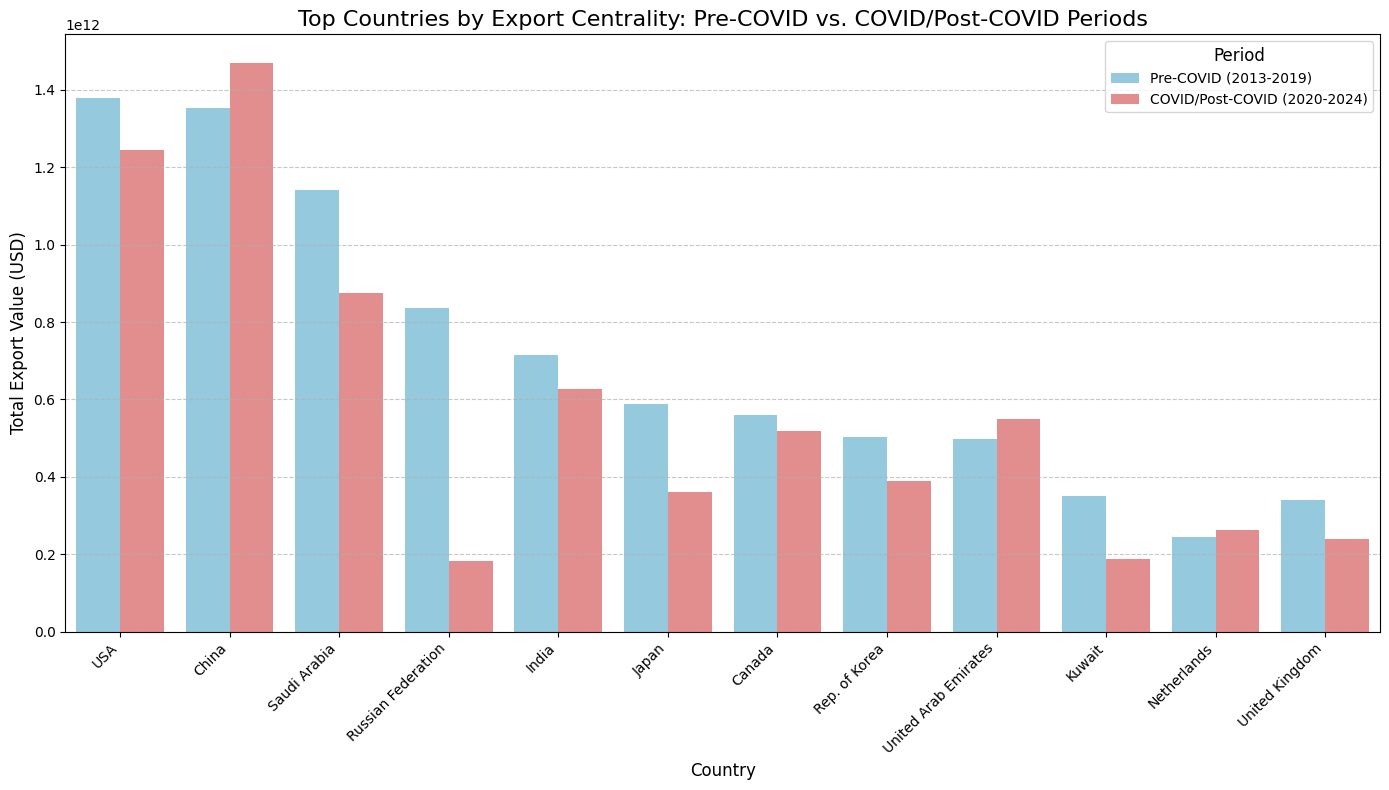

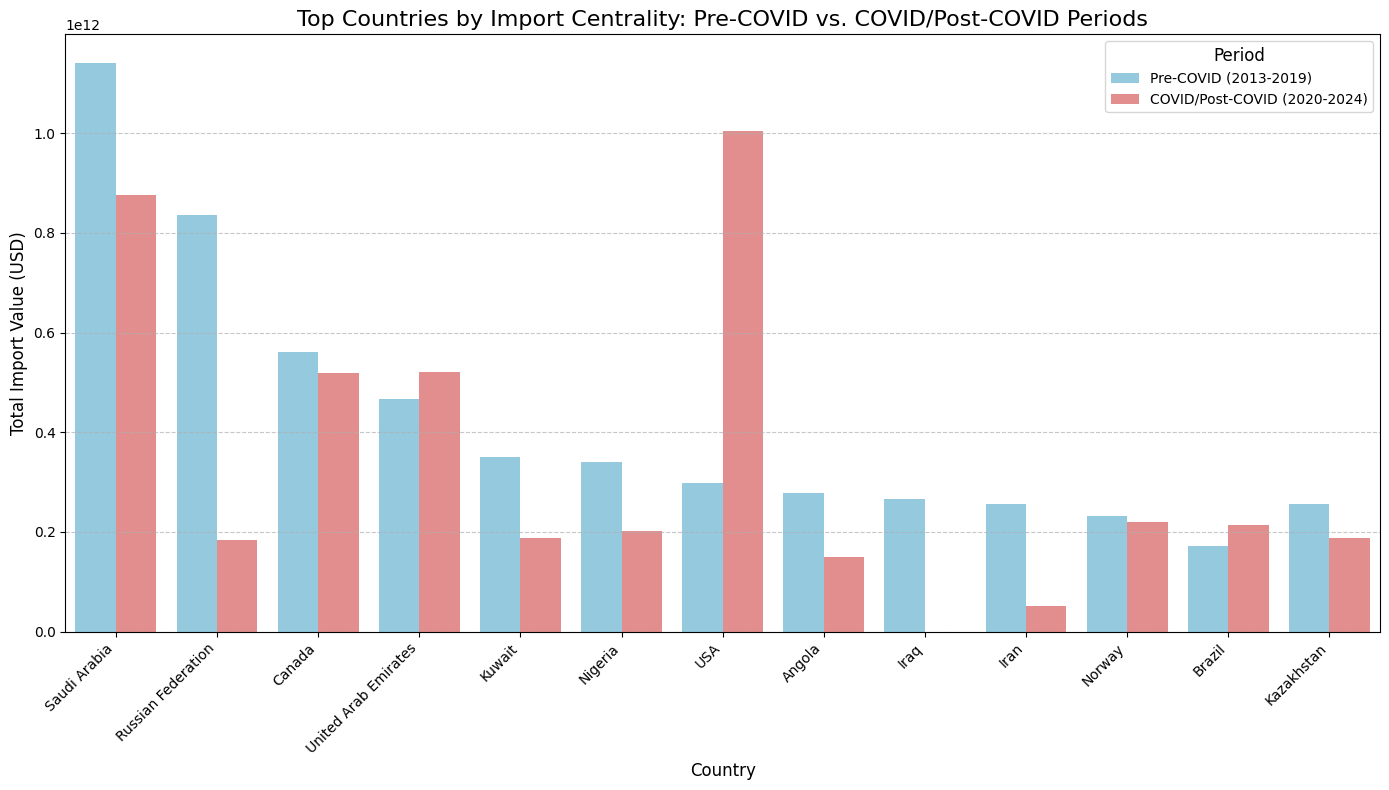

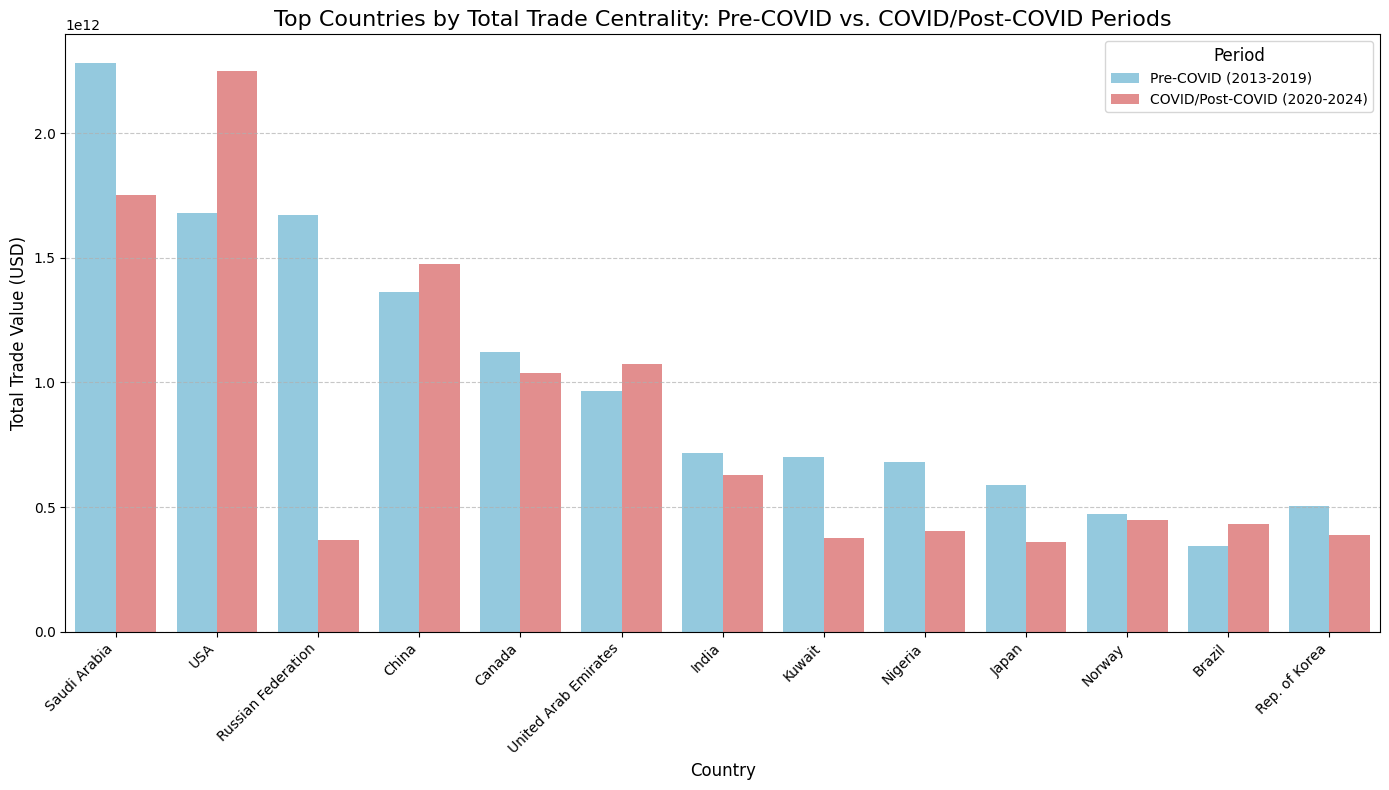

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Export Centrality ---
# Get top 10 exporters for pre-COVID
top10_export_pre_covid = export_centrality_pre_covid.sort_values(by='export_centrality', ascending=False).head(10)

# Get top 10 exporters for post-COVID
top10_export_post_covid = export_centrality_post_covid.sort_values(by='export_centrality', ascending=False).head(10)

# Combine unique countries from both periods for export centrality
unique_export_countries = pd.concat([top10_export_pre_covid['reporterISO'], top10_export_post_covid['reporterISO']]).unique()

# Create combined DataFrame for export centrality
combined_export_centrality = pd.DataFrame({'reporterISO': unique_export_countries})
combined_export_centrality = pd.merge(combined_export_centrality, export_centrality_pre_covid[['reporterISO', 'export_centrality']], on='reporterISO', how='left', suffixes=('_pre_covid', None))
combined_export_centrality = combined_export_centrality.rename(columns={'export_centrality': 'export_centrality_pre_covid'})
combined_export_centrality = pd.merge(combined_export_centrality, export_centrality_post_covid[['reporterISO', 'export_centrality']], on='reporterISO', how='left', suffixes=(None, '_post_covid'))
combined_export_centrality = combined_export_centrality.rename(columns={'export_centrality': 'export_centrality_post_covid'})
combined_export_centrality = combined_export_centrality.fillna(0)

# Melt for plotting
combined_export_centrality_melted = combined_export_centrality.melt(
    id_vars=['reporterISO'],
    value_vars=['export_centrality_pre_covid', 'export_centrality_post_covid'],
    var_name='Period',
    value_name='Export Centrality'
)
combined_export_centrality_melted['Period'] = combined_export_centrality_melted['Period'].replace({
    'export_centrality_pre_covid': 'Pre-COVID (2013-2019)',
    'export_centrality_post_covid': 'COVID/Post-COVID (2020-2024)'
})

# --- Import Centrality ---
# Get top 10 importers for pre-COVID
top10_import_pre_covid = import_centrality_pre_covid.sort_values(by='import_centrality', ascending=False).head(10)

# Get top 10 importers for post-COVID
top10_import_post_covid = import_centrality_post_covid.sort_values(by='import_centrality', ascending=False).head(10)

# Combine unique countries from both periods for import centrality
unique_import_countries = pd.concat([top10_import_pre_covid['reporterISO'], top10_import_post_covid['reporterISO']]).unique()

# Create combined DataFrame for import centrality
combined_import_centrality = pd.DataFrame({'reporterISO': unique_import_countries})
combined_import_centrality = pd.merge(combined_import_centrality, import_centrality_pre_covid[['reporterISO', 'import_centrality']], on='reporterISO', how='left', suffixes=('_pre_covid', None))
combined_import_centrality = combined_import_centrality.rename(columns={'import_centrality': 'import_centrality_pre_covid'})
combined_import_centrality = pd.merge(combined_import_centrality, import_centrality_post_covid[['reporterISO', 'import_centrality']], on='reporterISO', how='left', suffixes=(None, '_post_covid'))
combined_import_centrality = combined_import_centrality.rename(columns={'import_centrality': 'import_centrality_post_covid'})
combined_import_centrality = combined_import_centrality.fillna(0)

# Melt for plotting
combined_import_centrality_melted = combined_import_centrality.melt(
    id_vars=['reporterISO'],
    value_vars=['import_centrality_pre_covid', 'import_centrality_post_covid'],
    var_name='Period',
    value_name='Import Centrality'
)
combined_import_centrality_melted['Period'] = combined_import_centrality_melted['Period'].replace({
    'import_centrality_pre_covid': 'Pre-COVID (2013-2019)',
    'import_centrality_post_covid': 'COVID/Post-COVID (2020-2024)'
})

# --- Total Trade Centrality ---
# Get top 10 total trade countries for pre-COVID
top10_total_trade_pre_covid = total_trade_centrality_pre_covid.sort_values(by='total_trade_centrality', ascending=False).head(10)

# Get top 10 total trade countries for post-COVID
top10_total_trade_post_covid = total_trade_centrality_post_covid.sort_values(by='total_trade_centrality', ascending=False).head(10)

# Combine unique countries from both periods for total trade centrality
unique_total_trade_countries = pd.concat([top10_total_trade_pre_covid['reporterISO'], top10_total_trade_post_covid['reporterISO']]).unique()

# Create combined DataFrame for total trade centrality
combined_total_trade_centrality = pd.DataFrame({'reporterISO': unique_total_trade_countries})
combined_total_trade_centrality = pd.merge(combined_total_trade_centrality, total_trade_centrality_pre_covid[['reporterISO', 'total_trade_centrality']], on='reporterISO', how='left', suffixes=('_pre_covid', None))
combined_total_trade_centrality = combined_total_trade_centrality.rename(columns={'total_trade_centrality': 'total_trade_centrality_pre_covid'})
combined_total_trade_centrality = pd.merge(combined_total_trade_centrality, total_trade_centrality_post_covid[['reporterISO', 'total_trade_centrality']], on='reporterISO', how='left', suffixes=(None, '_post_covid'))
combined_total_trade_centrality = combined_total_trade_centrality.rename(columns={'total_trade_centrality': 'total_trade_centrality_post_covid'})
combined_total_trade_centrality = combined_total_trade_centrality.fillna(0)

# Melt for plotting
combined_total_trade_centrality_melted = combined_total_trade_centrality.melt(
    id_vars=['reporterISO'],
    value_vars=['total_trade_centrality_pre_covid', 'total_trade_centrality_post_covid'],
    var_name='Period',
    value_name='Total Trade Centrality'
)
combined_total_trade_centrality_melted['Period'] = combined_total_trade_centrality_melted['Period'].replace({
    'total_trade_centrality_pre_covid': 'Pre-COVID (2013-2019)',
    'total_trade_centrality_post_covid': 'COVID/Post-COVID (2020-2024)'
})

# --- Visualization ---

# Plot Export Centrality
plt.figure(figsize=(14, 8))
sns.barplot(
    x='reporterISO',
    y='Export Centrality',
    hue='Period',
    data=combined_export_centrality_melted,
    palette={'Pre-COVID (2013-2019)': 'skyblue', 'COVID/Post-COVID (2020-2024)': 'lightcoral'}
)
plt.title('Top Countries by Export Centrality: Pre-COVID vs. COVID/Post-COVID Periods', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Export Value (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Period', fontsize=10, title_fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot Import Centrality
plt.figure(figsize=(14, 8))
sns.barplot(
    x='reporterISO',
    y='Import Centrality',
    hue='Period',
    data=combined_import_centrality_melted,
    palette={'Pre-COVID (2013-2019)': 'skyblue', 'COVID/Post-COVID (2020-2024)': 'lightcoral'}
)
plt.title('Top Countries by Import Centrality: Pre-COVID vs. COVID/Post-COVID Periods', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Import Value (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Period', fontsize=10, title_fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot Total Trade Centrality
plt.figure(figsize=(14, 8))
sns.barplot(
    x='reporterISO',
    y='Total Trade Centrality',
    hue='Period',
    data=combined_total_trade_centrality_melted,
    palette={'Pre-COVID (2013-2019)': 'skyblue', 'COVID/Post-COVID (2020-2024)': 'lightcoral'}
)
plt.title('Top Countries by Total Trade Centrality: Pre-COVID vs. COVID/Post-COVID Periods', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Trade Value (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Period', fontsize=10, title_fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
